### Projet Machine Learning : Notebook R

In [10]:
library(dplyr)
library(naniar)


Attachement du package : ‘dplyr’


Les objets suivants sont masqués depuis ‘package:stats’:

    filter, lag


Les objets suivants sont masqués depuis ‘package:base’:

    intersect, setdiff, setequal, union




### I. Analyse exploratoire des données

In [11]:
# path="http://www.math.univ-toulouse.fr/~besse/Wikistat/data/"
path <- ""
df <- read.csv(paste(path, "global-data-on-sustainable-energy (1).csv", sep = ""),
                    sep = ",", dec="." ,header = TRUE)
# Premières lignes du jeu de données
head(df)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


1. Commencez par vérifier la nature des différentes variables et leur encodage. Convertissez la variable
Year en une variable qualitative. N.B. Curieusement, la variable Density (P/Km2) n’est pas con-
sidérée comme une variable numérique. Convertissez-là en une variable numérique en prenant soin de
ne pas transformer les nombre décimaux en NA. Par exemple, en R, vous pourrez utiliser la formule:
as.numeric(gsub(",","",data$Density.n.P.Km2.)), où data représente le jeu de données utilisé.

In [12]:
summary(df)

    Entity               Year      Access.to.electricity....of.population.
 Length:3649        Min.   :2000   Min.   :  1.252                        
 Class :character   1st Qu.:2005   1st Qu.: 59.801                        
 Mode  :character   Median :2010   Median : 98.362                        
                    Mean   :2010   Mean   : 78.934                        
                    3rd Qu.:2015   3rd Qu.:100.000                        
                    Max.   :2020   Max.   :100.000                        
                                   NA's   :10                             
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 23.18                   
 Median : 83.15                   
 Mean   : 63.26                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
 NA's   :169                      
 Renewable.electricity.generating.capacity.per.capita
 Min.   :   0.00                                     
 1st Qu.:   

In [13]:
print("---Variable Year---")

df[,"Year"] <- as.factor(df[,"Year"])
summary(df["Year"])

print("---Variable Entity---")

df[,"Entity"] <- as.factor(df[,"Entity"])
summary(df["Entity"])

print("---Variable Density.P.Km2.---")

df[,"Density.P.Km2."] <- as.numeric(gsub(",",".",(df[,"Density.P.Km2."])))
summary(df["Density.P.Km2."])

[1] "---Variable Year---"


      Year     
 2013   : 175  
 2014   : 175  
 2015   : 175  
 2016   : 175  
 2017   : 175  
 2018   : 175  
 (Other):2599  

[1] "---Variable Entity---"


                 Entity    
 Afghanistan        :  21  
 Albania            :  21  
 Algeria            :  21  
 Angola             :  21  
 Antigua and Barbuda:  21  
 Argentina          :  21  
 (Other)            :3523  

[1] "---Variable Density.P.Km2.---"


 Density.P.Km2.    
 Min.   :   1.265  
 1st Qu.:  26.000  
 Median :  81.000  
 Mean   : 137.058  
 3rd Qu.: 203.000  
 Max.   :1281.000  
 NA's   :1         

2. Déterminez le taux de valeurs manquantes pour chaque variable.
On propose de supprimer pour ce projet les variables comportant un taux de données manquantes très im-
portant: Renewable-electricity-generating-capacity-per-capita, Financial flows to developing
countries (US Dollars) et Renewables (% equivalent primary energy).

[1] "0 : Entity"
[1] "0 : Year"
[1] "0.274047684297068 : Access.to.electricity....of.population."
[1] "4.63140586462044 : Access.to.clean.fuels.for.cooking"
[1] "25.513839408057 : Renewable.electricity.generating.capacity.per.capita"
[1] "57.2485612496574 : Financial.flows.to.developing.countries..US..."
[1] "5.31652507536311 : Renewable.energy.share.in.the.total.final.energy.consumption...."
[1] "0.575500137023842 : Electricity.from.fossil.fuels..TWh."
[1] "3.45300082214305 : Electricity.from.nuclear..TWh."
[1] "0.575500137023842 : Electricity.from.renewables..TWh."
[1] "1.15100027404768 : Low.carbon.electricity....electricity."
[1] "0 : Primary.energy.consumption.per.capita..kWh.person."
[1] "5.6727870649493 : Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."
[1] "11.7292408879145 : Value_co2_emissions_kt_by_country"
[1] "58.5639901342834 : Renewables....equivalent.primary.energy."
[1] "8.68731159221705 : gdp_growth"
[1] "7.72814469717731 : gdp_per_capita"
[1] "0.027404768

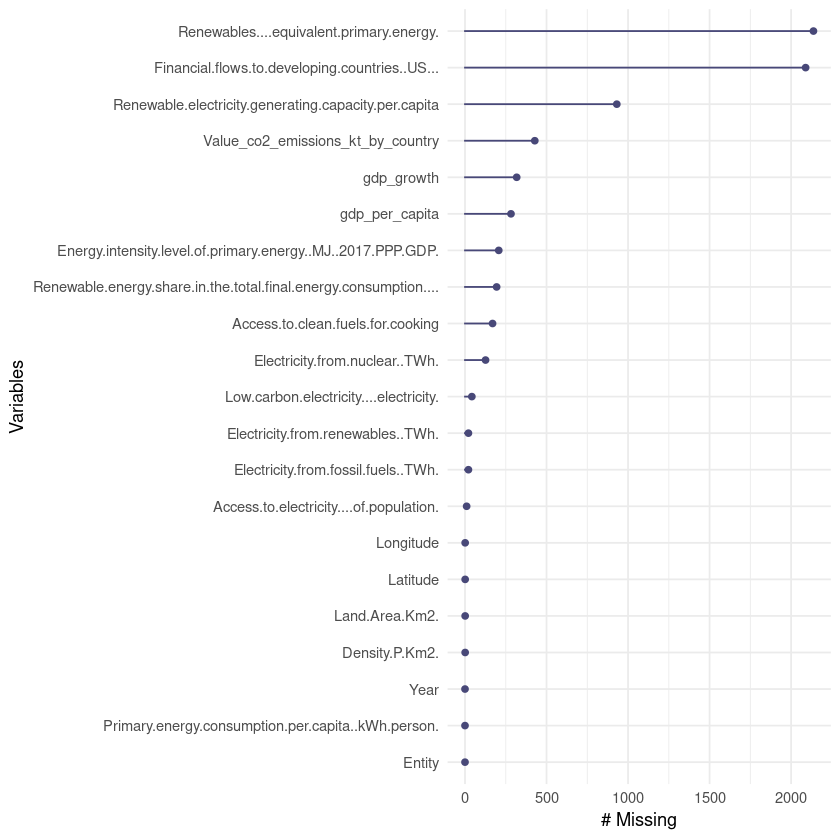

In [14]:
for (i in names(df))
  print(paste(sum(is.na(df[i])/nrow(df)*100) ,":", i))

gg_miss_var(df)

In [15]:
df <- subset(df, select = -c(Renewable.electricity.generating.capacity.per.capita, Financial.flows.to.developing.countries..US..., Renewables....equivalent.primary.energy.))

On enlève donc les colonnes inutiles, car présentant trop de données manquantes. (Renewable.electricity.generating.capacity.per.capita, Financial.flows.to.developing.countries..US..., Renewables....equivalent.primary.energy.)

In [16]:
summary(df)

                 Entity          Year     
 Afghanistan        :  21   2013   : 175  
 Albania            :  21   2014   : 175  
 Algeria            :  21   2015   : 175  
 Angola             :  21   2016   : 175  
 Antigua and Barbuda:  21   2017   : 175  
 Argentina          :  21   2018   : 175  
 (Other)            :3523   (Other):2599  
 Access.to.electricity....of.population. Access.to.clean.fuels.for.cooking
 Min.   :  1.252                         Min.   :  0.00                   
 1st Qu.: 59.801                         1st Qu.: 23.18                   
 Median : 98.362                         Median : 83.15                   
 Mean   : 78.934                         Mean   : 63.26                   
 3rd Qu.:100.000                         3rd Qu.:100.00                   
 Max.   :100.000                         Max.   :100.00                   
 NA's   :10                              NA's   :169                      
 Renewable.energy.share.in.the.total.final.energy.consum

3. Pour la suite de l’étude, vous allez créer un jeu de données comportant seulement les individus qui n’ont
pas de valeur manquante. Il reste alors 2868 observations

In [17]:
df <- na.omit(df)

In [18]:
print(paste("Le jeu de données contient désormais",nrow(df),"lignes, après avoir supprimé les lignes comportant des valeurs manquantes"))

[1] "Le jeu de données contient désormais 2868 lignes, après avoir supprimé les lignes comportant des valeurs manquantes"


4. Commencez l’exploration par une analyse descriptive unidimensionnelle des données. Des transformations
des variables quantitatives vous semblent-t-elles pertinentes ?


Attachement du package : ‘gridExtra’


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine




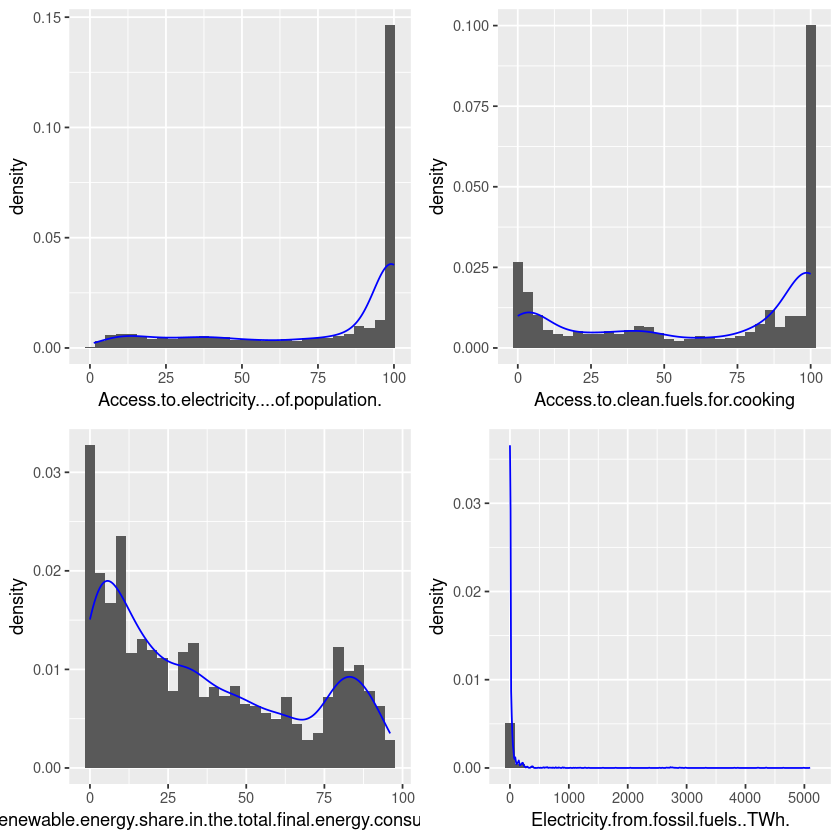

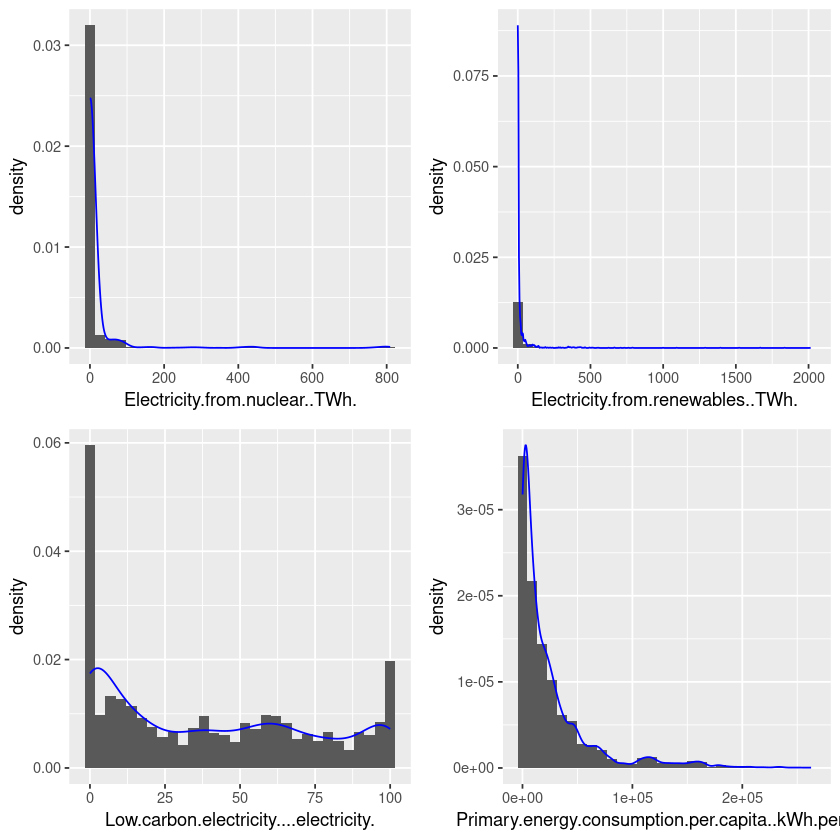

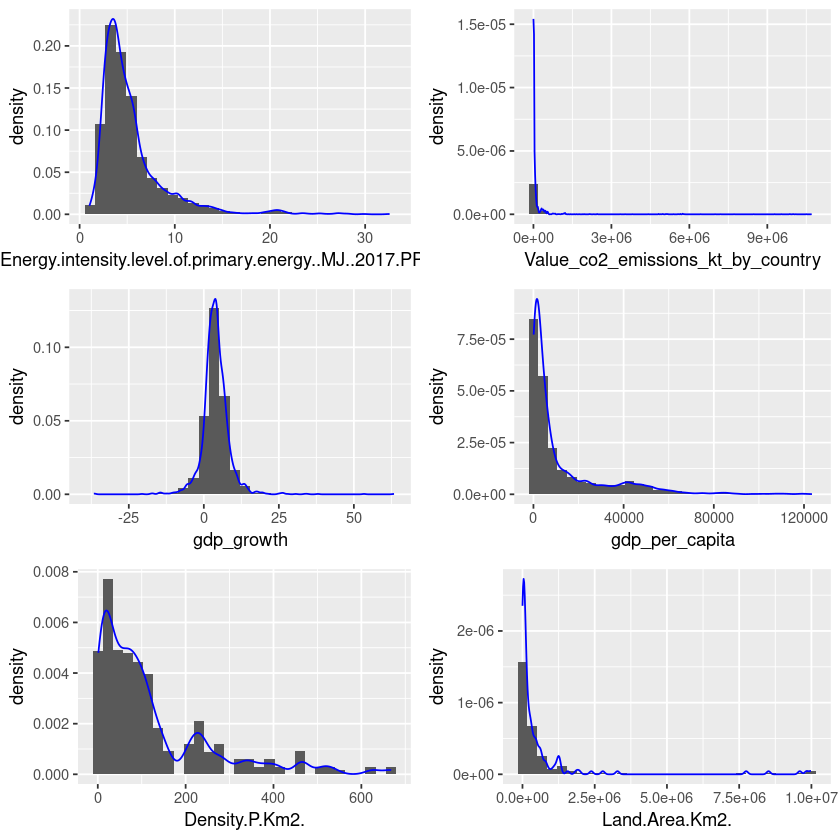

In [19]:
library(ggplot2)
library(gridExtra)

bins = 30

g1<-ggplot(df,aes(x=Access.to.electricity....of.population.))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g2<-ggplot(df,aes(x=Access.to.clean.fuels.for.cooking))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g3<-ggplot(df,aes(x=Renewable.energy.share.in.the.total.final.energy.consumption....))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g4<-ggplot(df,aes(x=Electricity.from.fossil.fuels..TWh.))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g5<-ggplot(df,aes(x=Electricity.from.nuclear..TWh.))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g6<-ggplot(df,aes(x=Electricity.from.renewables..TWh.))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g7<-ggplot(df,aes(x=Low.carbon.electricity....electricity.))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g8<-ggplot(df,aes(x=Primary.energy.consumption.per.capita..kWh.person.))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g9<-ggplot(df,aes(x=Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g10<-ggplot(df,aes(x=Value_co2_emissions_kt_by_country))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g11<-ggplot(df,aes(x=gdp_growth))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g12<-ggplot(df,aes(x=gdp_per_capita))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g13<-ggplot(df,aes(x=Density.P.Km2.))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

g14<-ggplot(df,aes(x=Land.Area.Km2.))+
    geom_histogram(aes(y=after_stat(density)), bins = bins)+
    geom_density(alpha=.2, col="blue") 

grid.arrange(g1,g2, g3,g4,ncol=2)
grid.arrange(g5,g6,g7,g8,ncol=2)
grid.arrange(g9, g10, g11, g12, g13, g14, ncol=2)

rm(g1, g2, g3, g4, g5, g6, g7, g8, g9, g10, g11, g12, g13, g14)

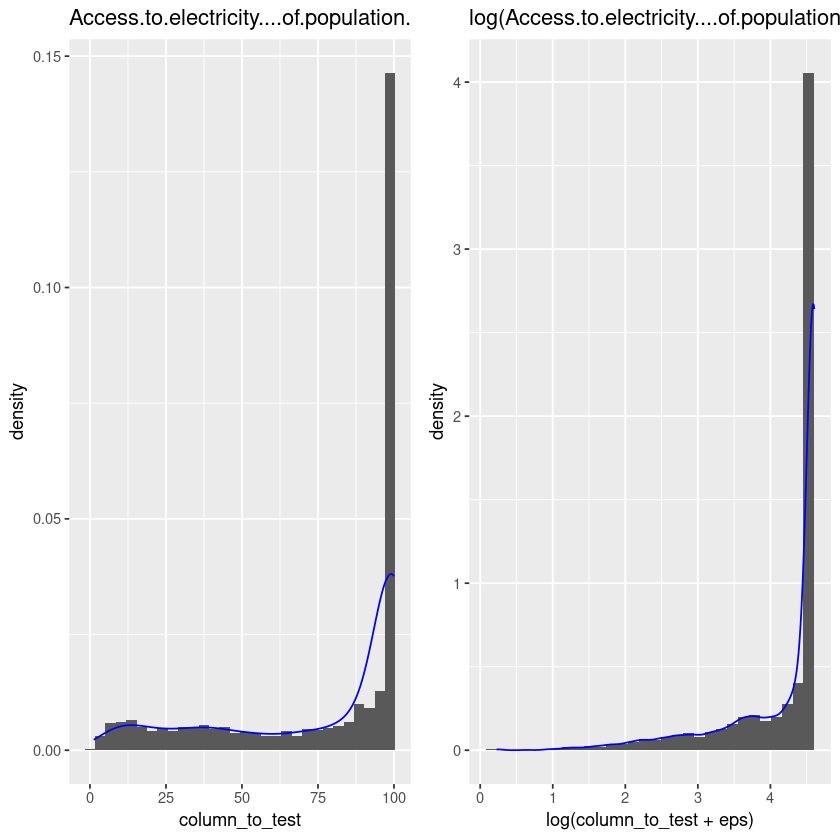

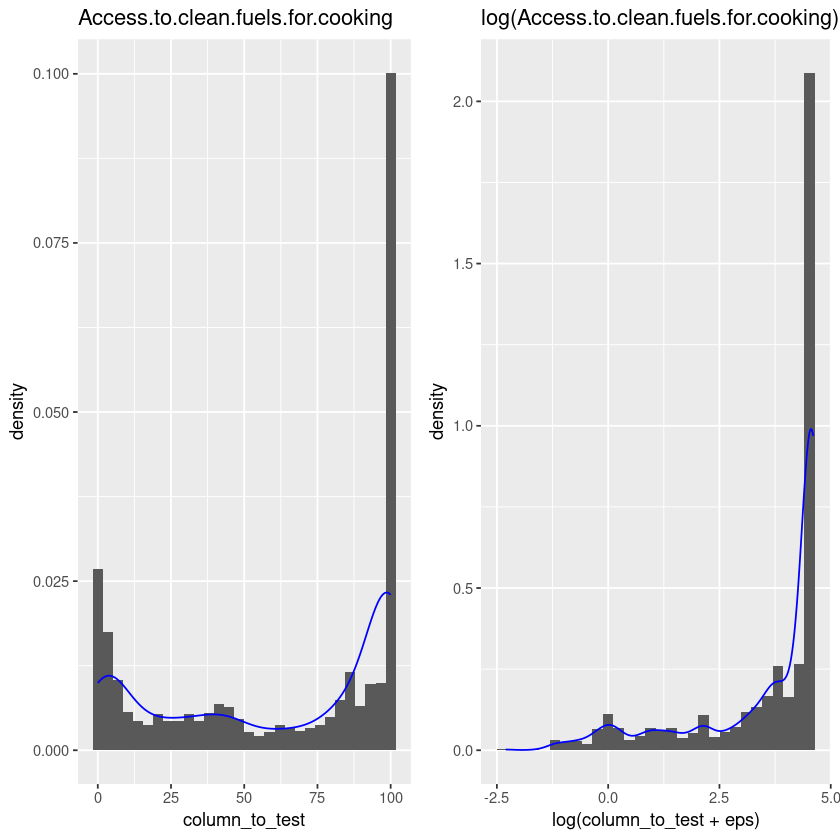

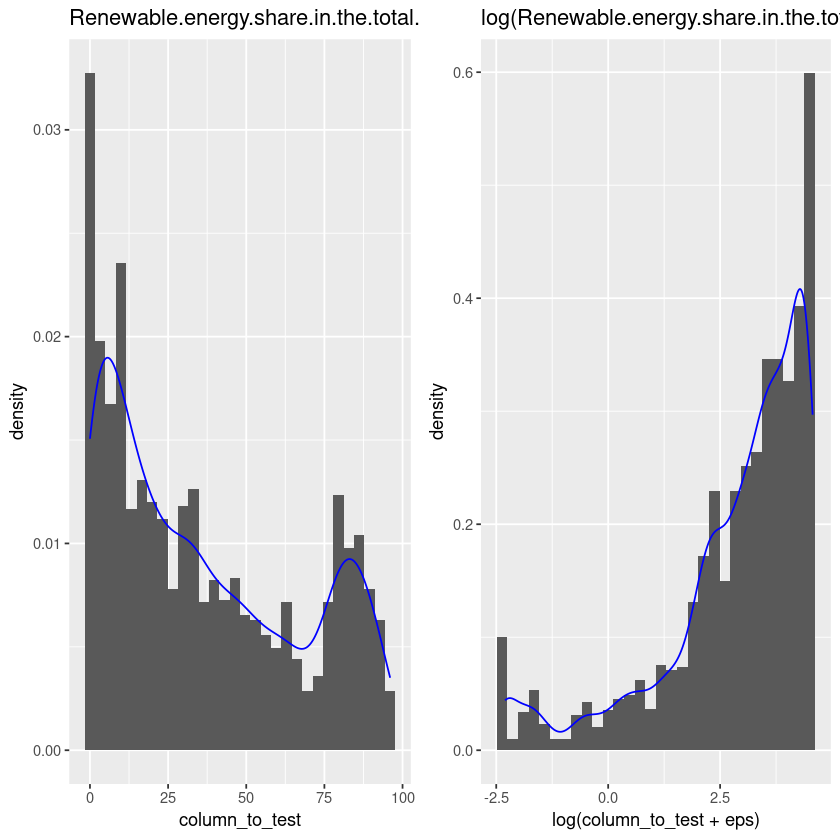

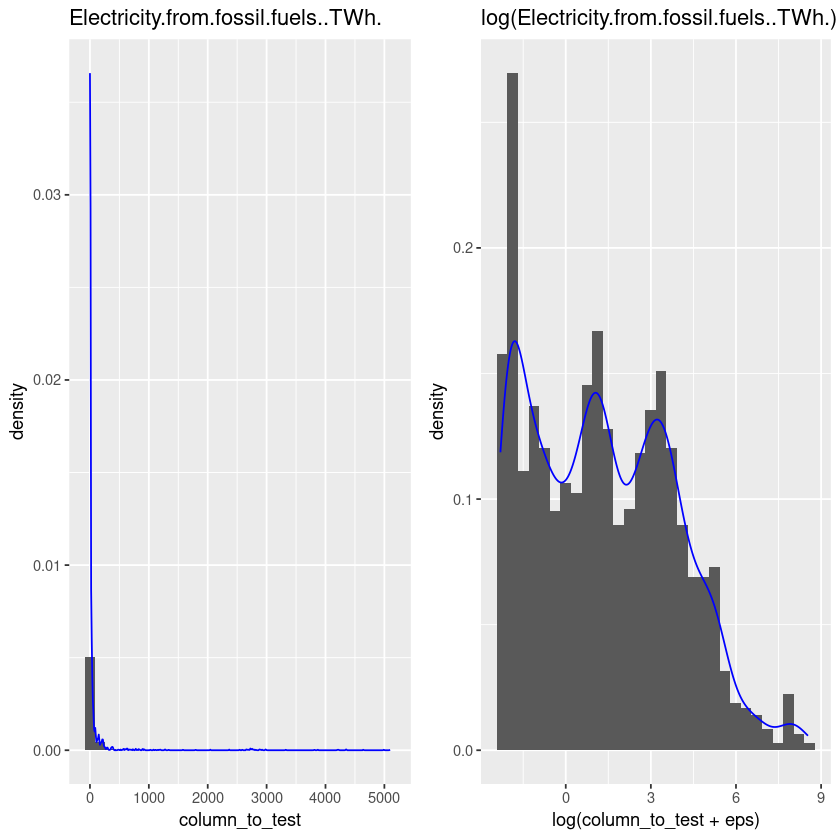

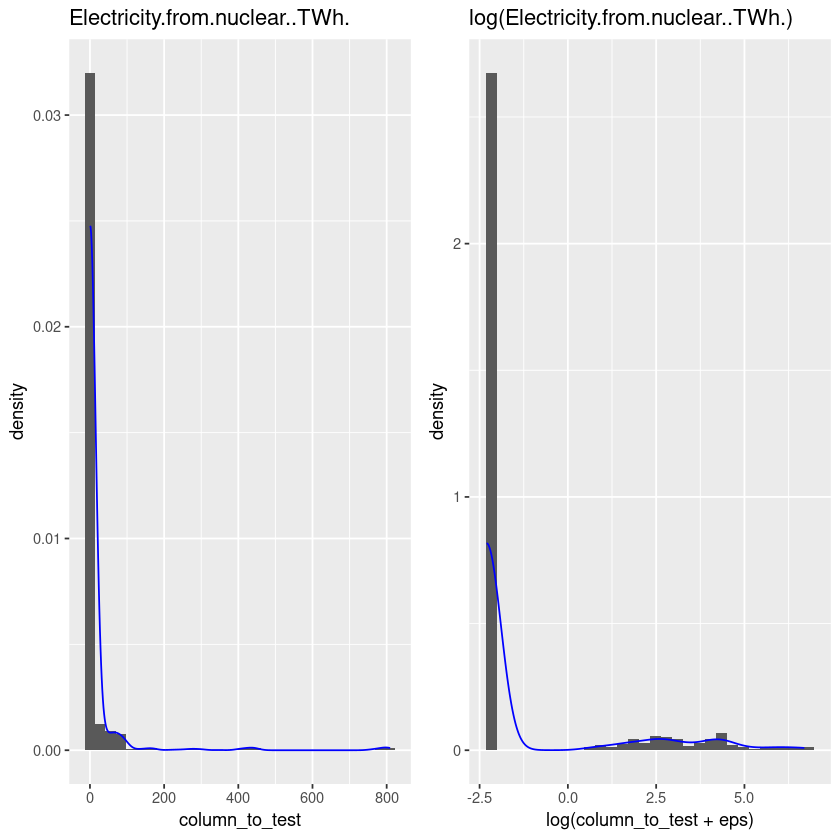

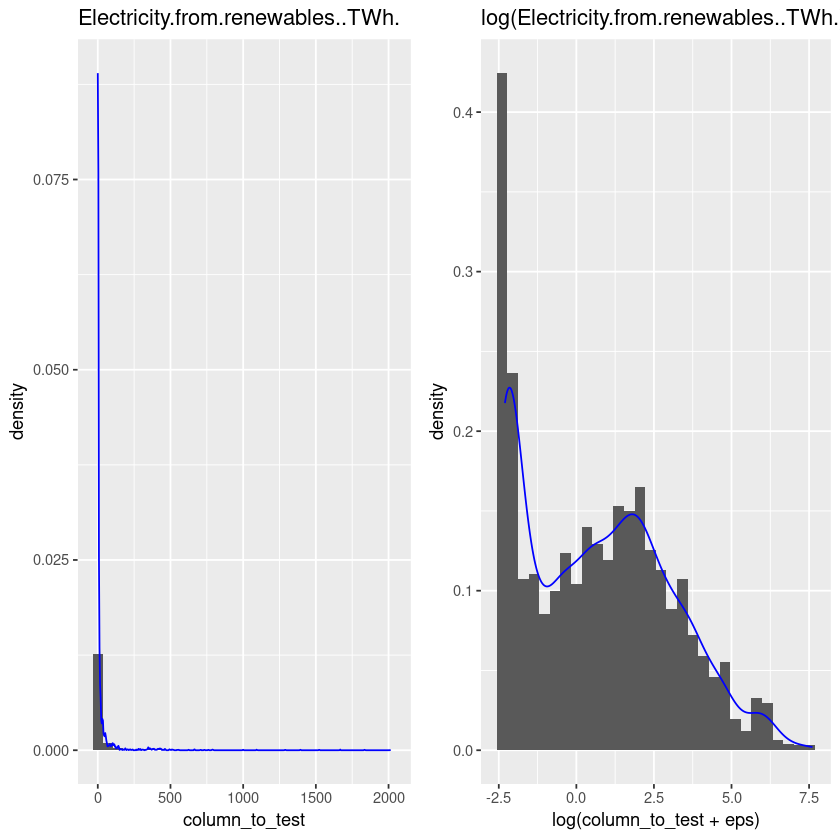

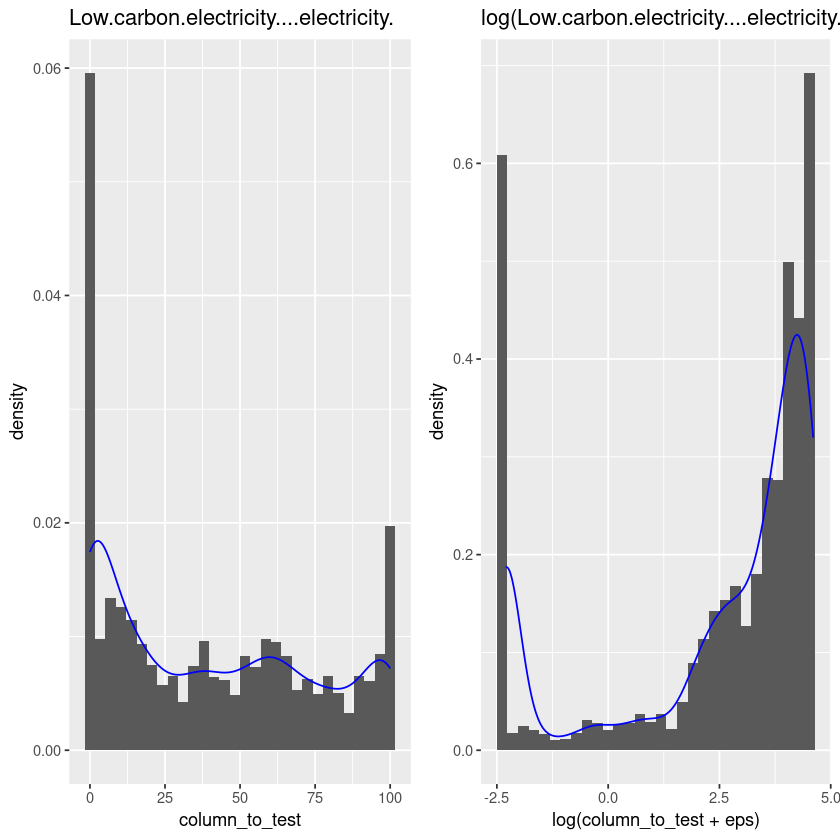

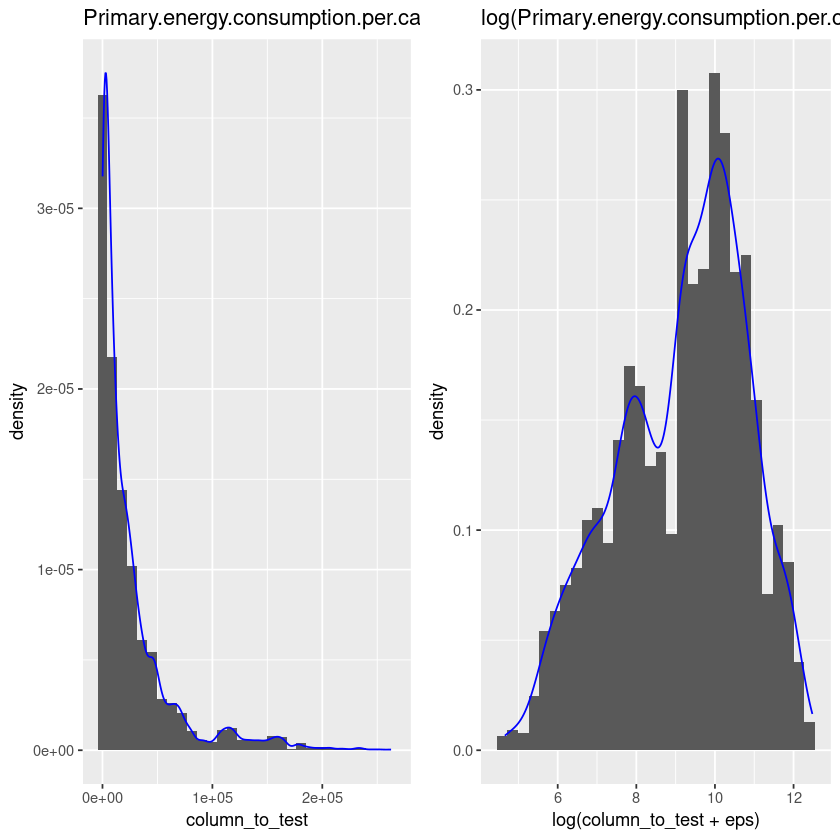

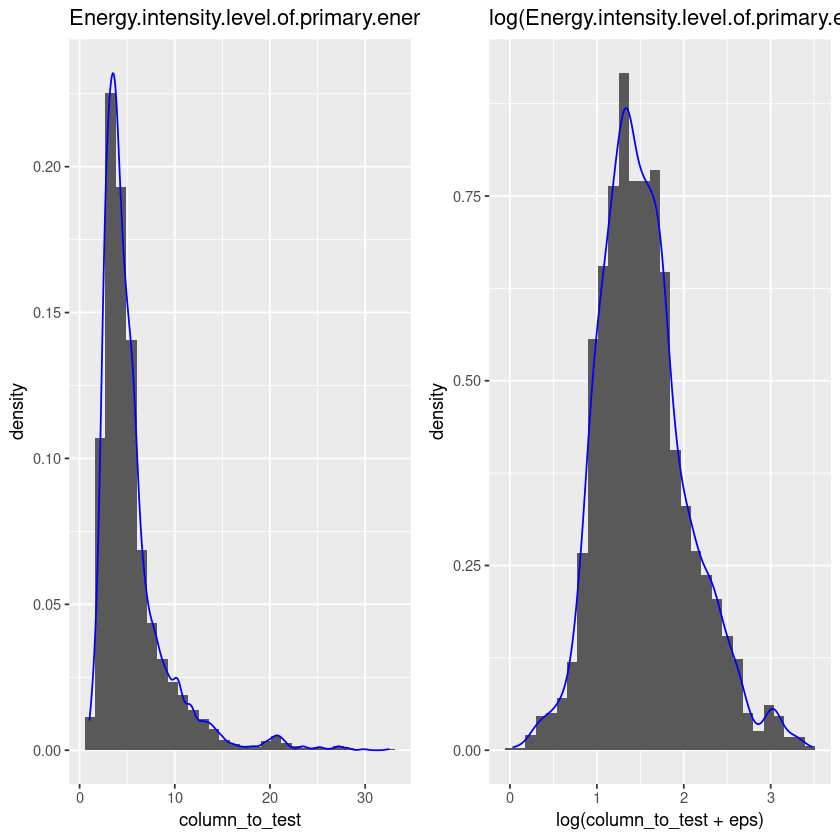

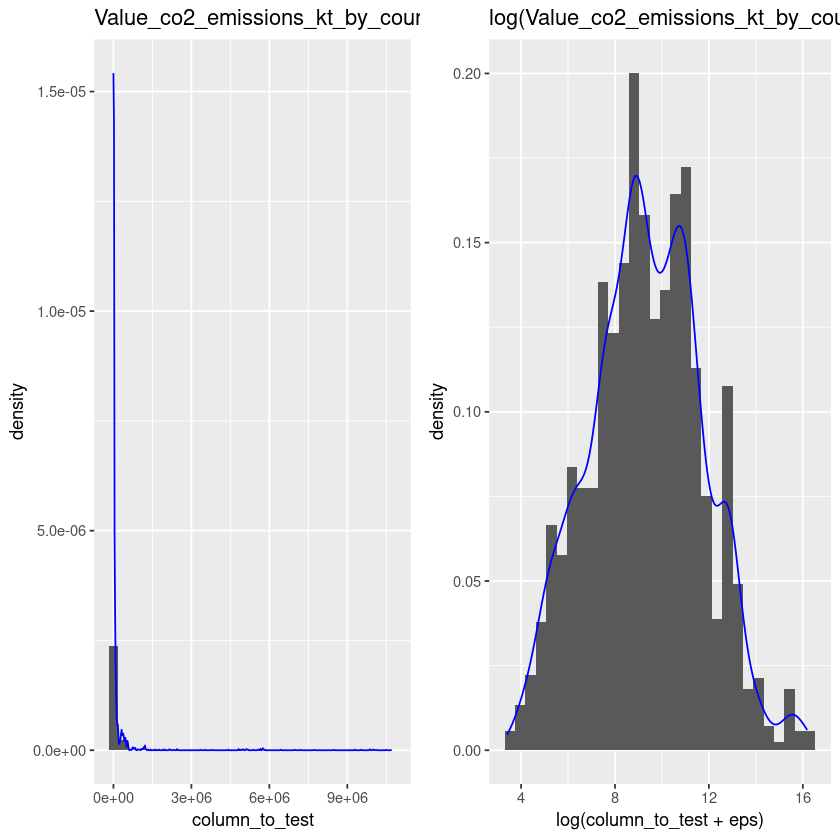

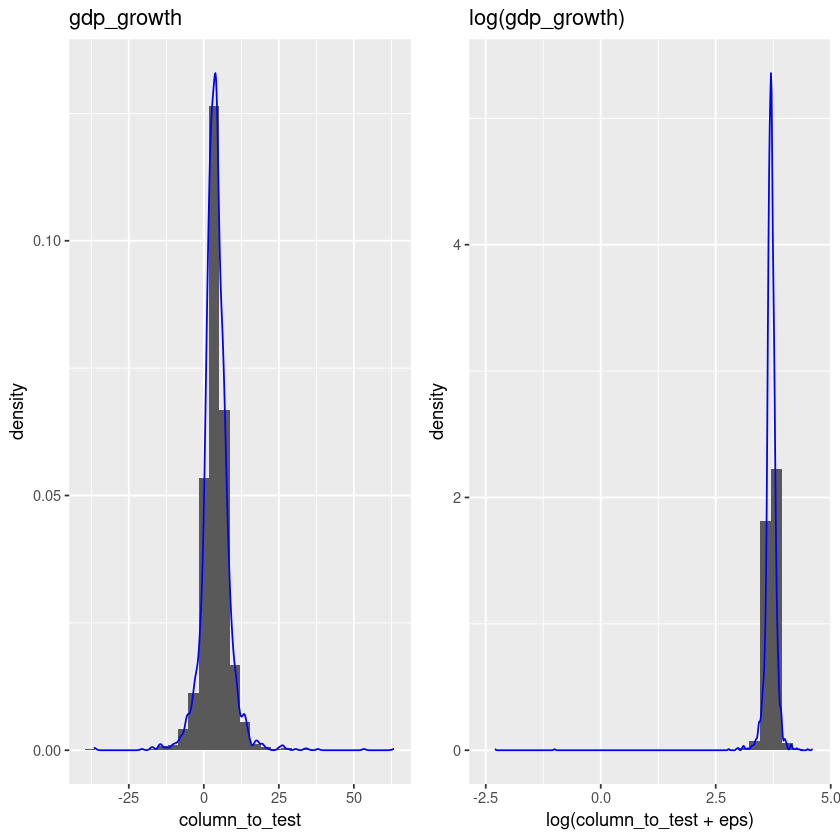

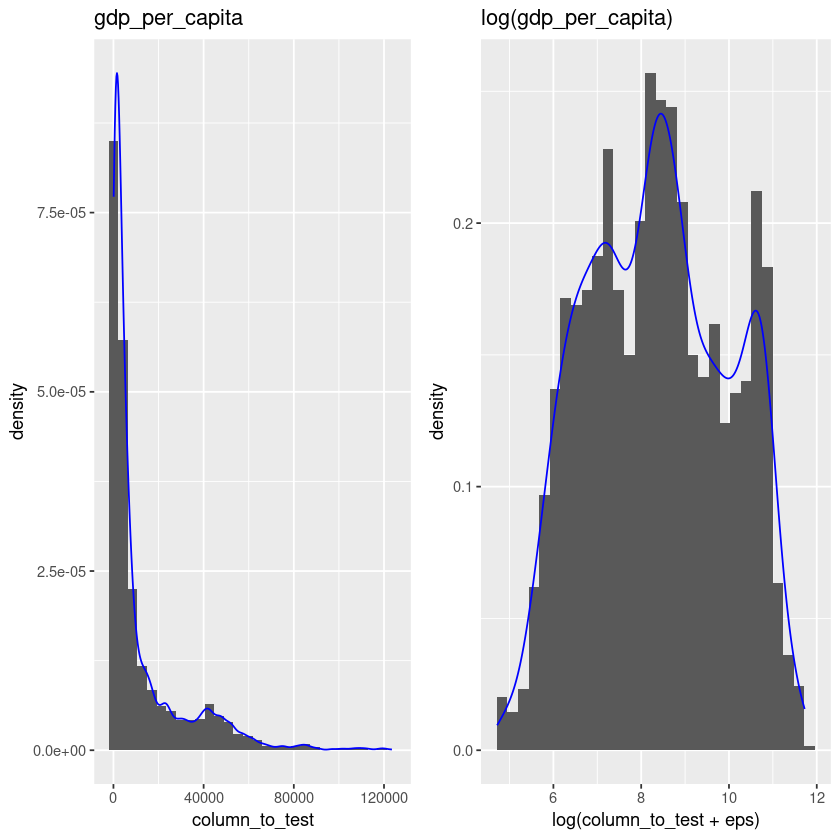

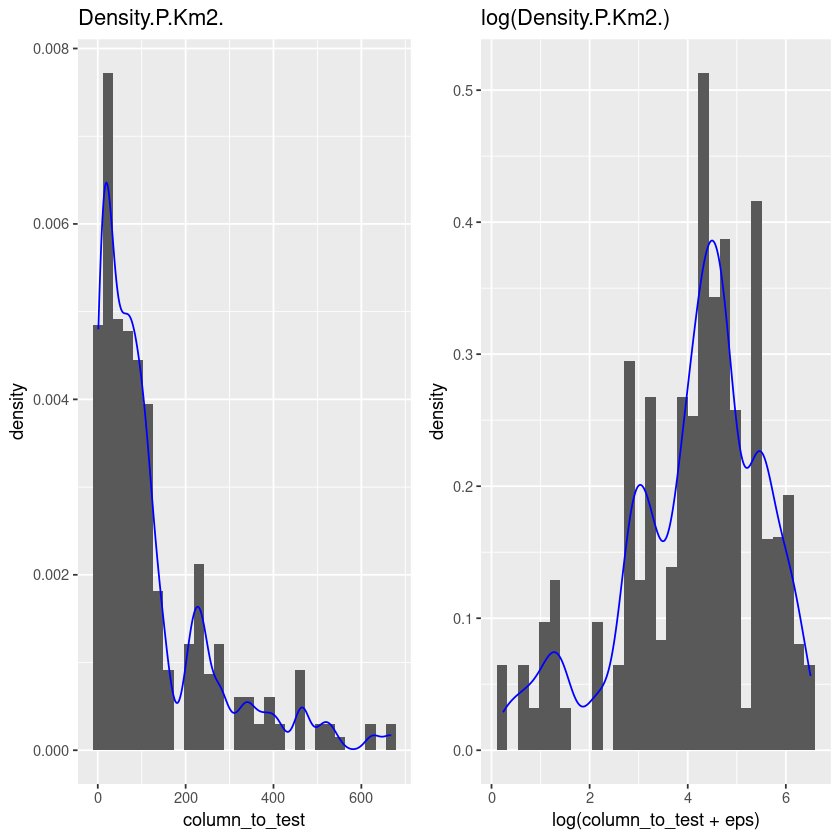

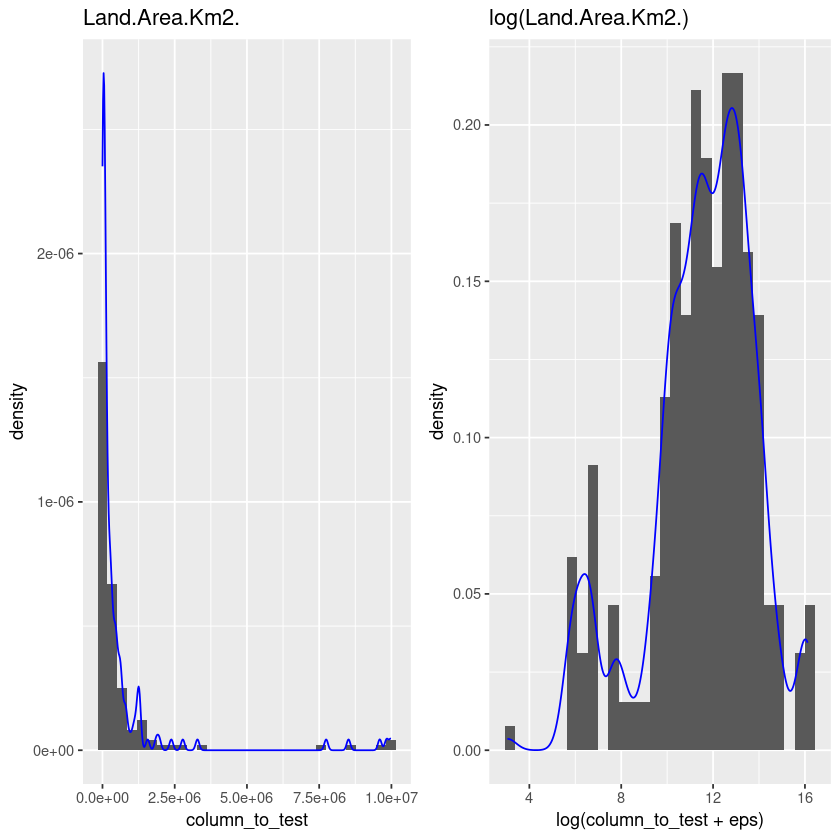

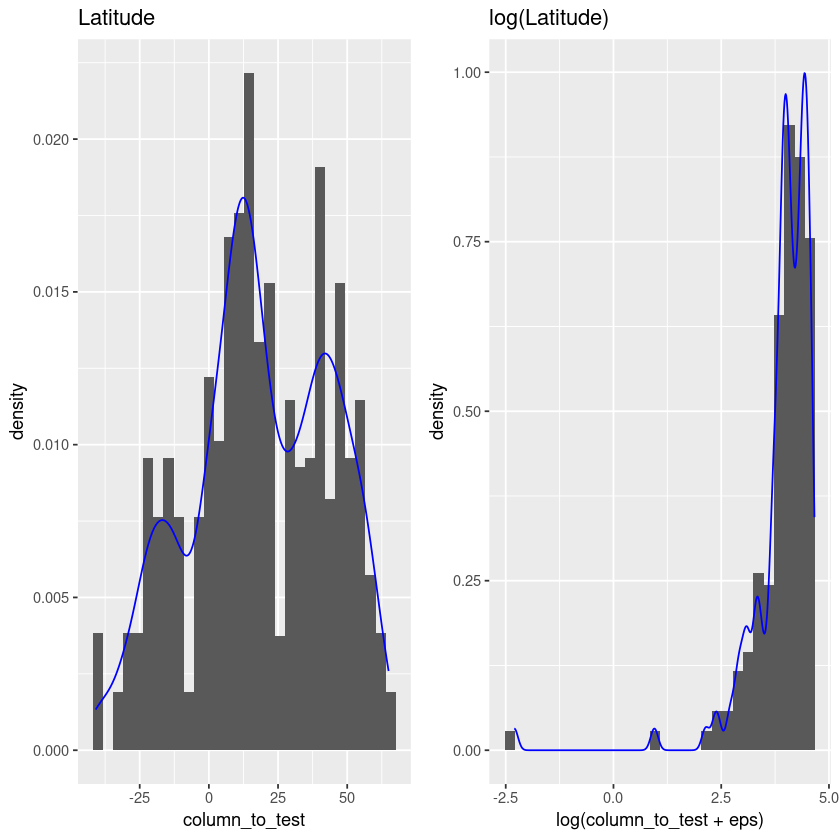

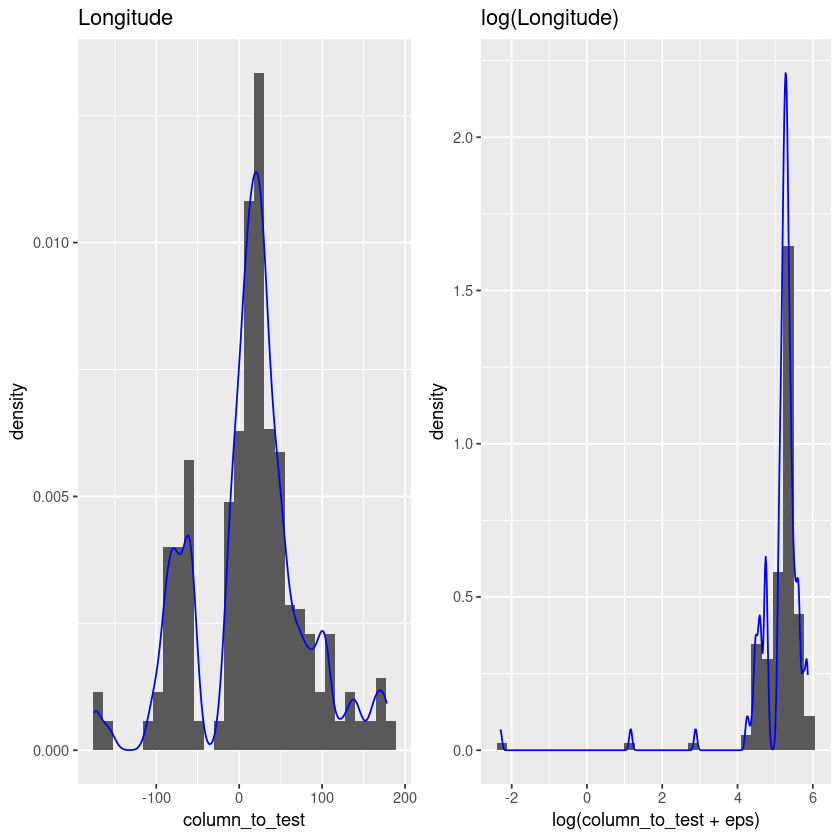

In [20]:
interesting_columns <- select(df, -c(Entity, Year))

for (i in 1:ncol(interesting_columns)){
    
  column_to_test = interesting_columns[,i]
  colname = colnames(interesting_columns)[i]
  
  eps = 0
  if (min(column_to_test)<=0){
    eps = abs(min(column_to_test)) + 0.1
  }
  
  g1<-ggplot(interesting_columns,aes(x=column_to_test))+
  geom_histogram(aes(y=after_stat(density)), bins = bins)+
  geom_density(alpha=.2, col="blue")+
  ggtitle(colname)
  
  g2<-ggplot(interesting_columns,aes(x=log(column_to_test + eps)))+
  geom_histogram(aes(y=after_stat(density)), bins = bins)+
  geom_density(alpha=.2, col="blue")+
  ggtitle(paste("log(",colname,")", sep=""))
  
  grid.arrange(g1, g2, ncol = 2)
  
}

In [21]:
df <- df %>% mutate(log_Primary.energy.consumption.per.capita..kWh.person. = log(Primary.energy.consumption.per.capita..kWh.person.),
                    log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. = log(Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.),
                    log_gdp_per_capita = log(gdp_per_capita),
                    log_Value_co2_emissions_kt_by_country = log(Value_co2_emissions_kt_by_country),
                    log_Density.P.Km2. = log(Density.P.Km2.),
                    log_Land.Area.Km2. = Land.Area.Km2.)

head(df)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,Low.carbon.electricity....electricity.,Primary.energy.consumption.per.capita..kWh.person.,⋯,Density.P.Km2.,Land.Area.Km2.,Latitude,Longitude,log_Primary.energy.consumption.per.capita..kWh.person.,log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,log_gdp_per_capita,log_Value_co2_emissions_kt_by_country,log_Density.P.Km2.,log_Land.Area.Km2.
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
4,Afghanistan,2003,14.73851,9.50,36.66,0.31,0,0.63,67.02128,229.9682,⋯,60,652230,33.93911,67.70995,5.437941,0.3364722,5.250617,7.106606,4.094345,652230
5,Afghanistan,2004,20.06497,10.90,44.24,0.33,0,0.56,62.92135,204.2312,⋯,60,652230,33.93911,67.70995,5.319253,0.1823216,5.353667,6.937314,4.094345,652230
6,Afghanistan,2005,25.39089,12.20,33.88,0.34,0,0.59,63.44086,252.0691,⋯,60,652230,33.93911,67.70995,5.529703,0.3435897,5.489067,7.346010,4.094345,652230
7,Afghanistan,2006,30.71869,13.85,31.89,0.20,0,0.64,76.19048,304.4209,⋯,60,652230,33.93911,67.70995,5.718411,0.4054651,5.574940,7.473069,4.094345,652230
8,Afghanistan,2007,36.05101,15.30,28.78,0.20,0,0.75,78.94737,354.2799,⋯,60,652230,33.93911,67.70995,5.870087,0.4252677,5.885251,7.478735,4.094345,652230
9,Afghanistan,2008,42.40000,16.70,21.17,0.19,0,0.54,73.97260,607.8335,⋯,60,652230,33.93911,67.70995,6.409901,0.6626880,5.898975,8.177516,4.094345,652230


5. Visualisez la grande hétérogénéité des émissions de CO2 entre les pays. Quels sont les 5 pays les plus
émetteurs de CO2 ?

In [22]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()        masks base::%||%()
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


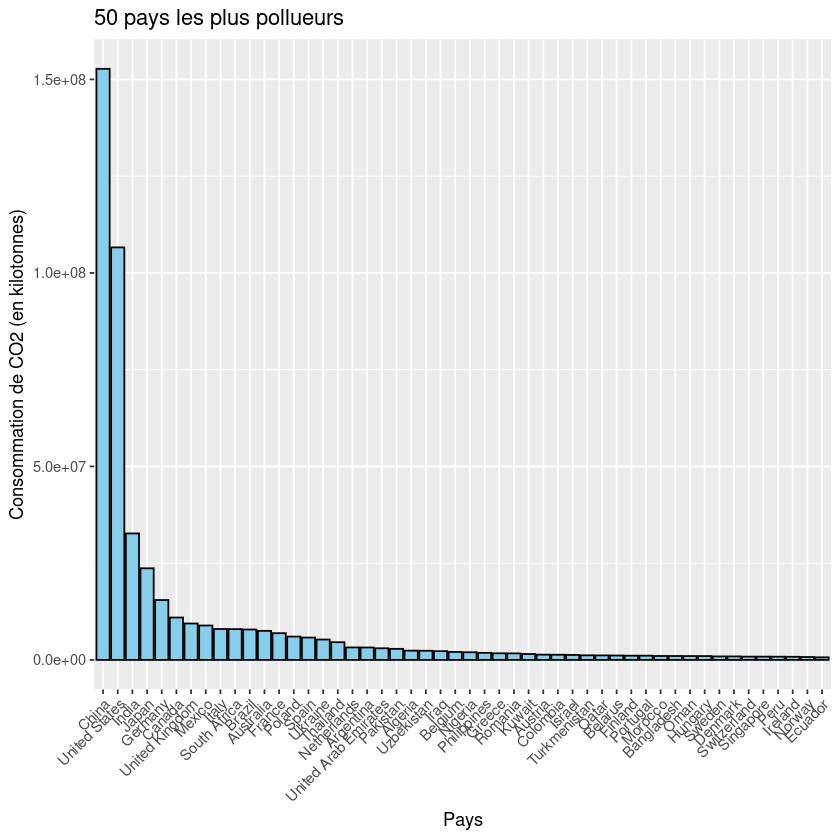

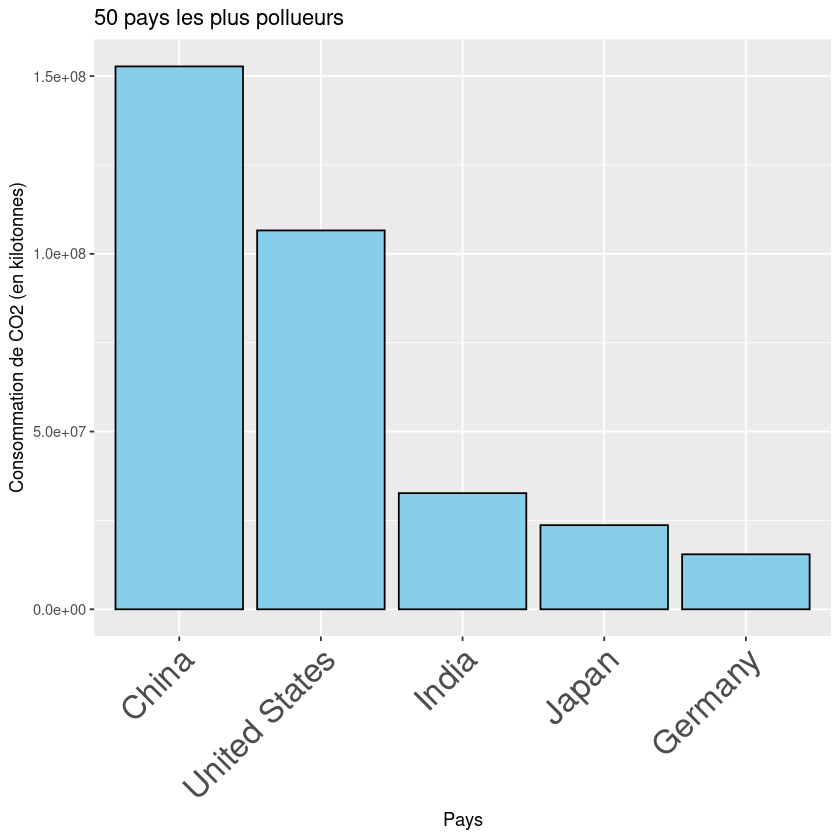

In [23]:
emissions_par_pays <- df %>% select(Entity,Value_co2_emissions_kt_by_country)

emissions_par_pays <- emissions_par_pays %>% ## on regroupe les pays en sommant leur consommation de co2
  group_by(Entity) %>%
  summarise(Value_co2_emissions_kt_by_country = sum(Value_co2_emissions_kt_by_country))

emissions_par_pays<- emissions_par_pays %>% arrange(desc(Value_co2_emissions_kt_by_country)) ## on classe par ordre décroissant

#emissions_par_pays <- distinct(emissions_par_pays,Entity)
# On sélectionne les 50 pays les plus pollueurs
emissions_par_pays <- emissions_par_pays %>% slice(1:50)

ggplot(emissions_par_pays, aes(x = reorder(Entity, -Value_co2_emissions_kt_by_country), y = Value_co2_emissions_kt_by_country)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(x = "Pays", y = "Consommation de CO2 (en kilotonnes)", title = "50 pays les plus pollueurs") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 9))


## On sélectionne les 5 pays les plus pollueurs
emissions_par_pays <- emissions_par_pays %>% slice(1:5)
ggplot(emissions_par_pays, aes(x = reorder(Entity, -Value_co2_emissions_kt_by_country), y = Value_co2_emissions_kt_by_country)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(x = "Pays", y = "Consommation de CO2 (en kilotonnes)", title = "50 pays les plus pollueurs") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 20))

6. Poursuivez avec une analyse descriptive multidimensionnelle. Utilisez des techniques de visualisation: par
exemple les nuages de points (scatterplot), des graphes des correlations... Analysez les dépendances entre
les variables quantitatives

In [24]:
library(corrplot)

corrplot 0.92 loaded



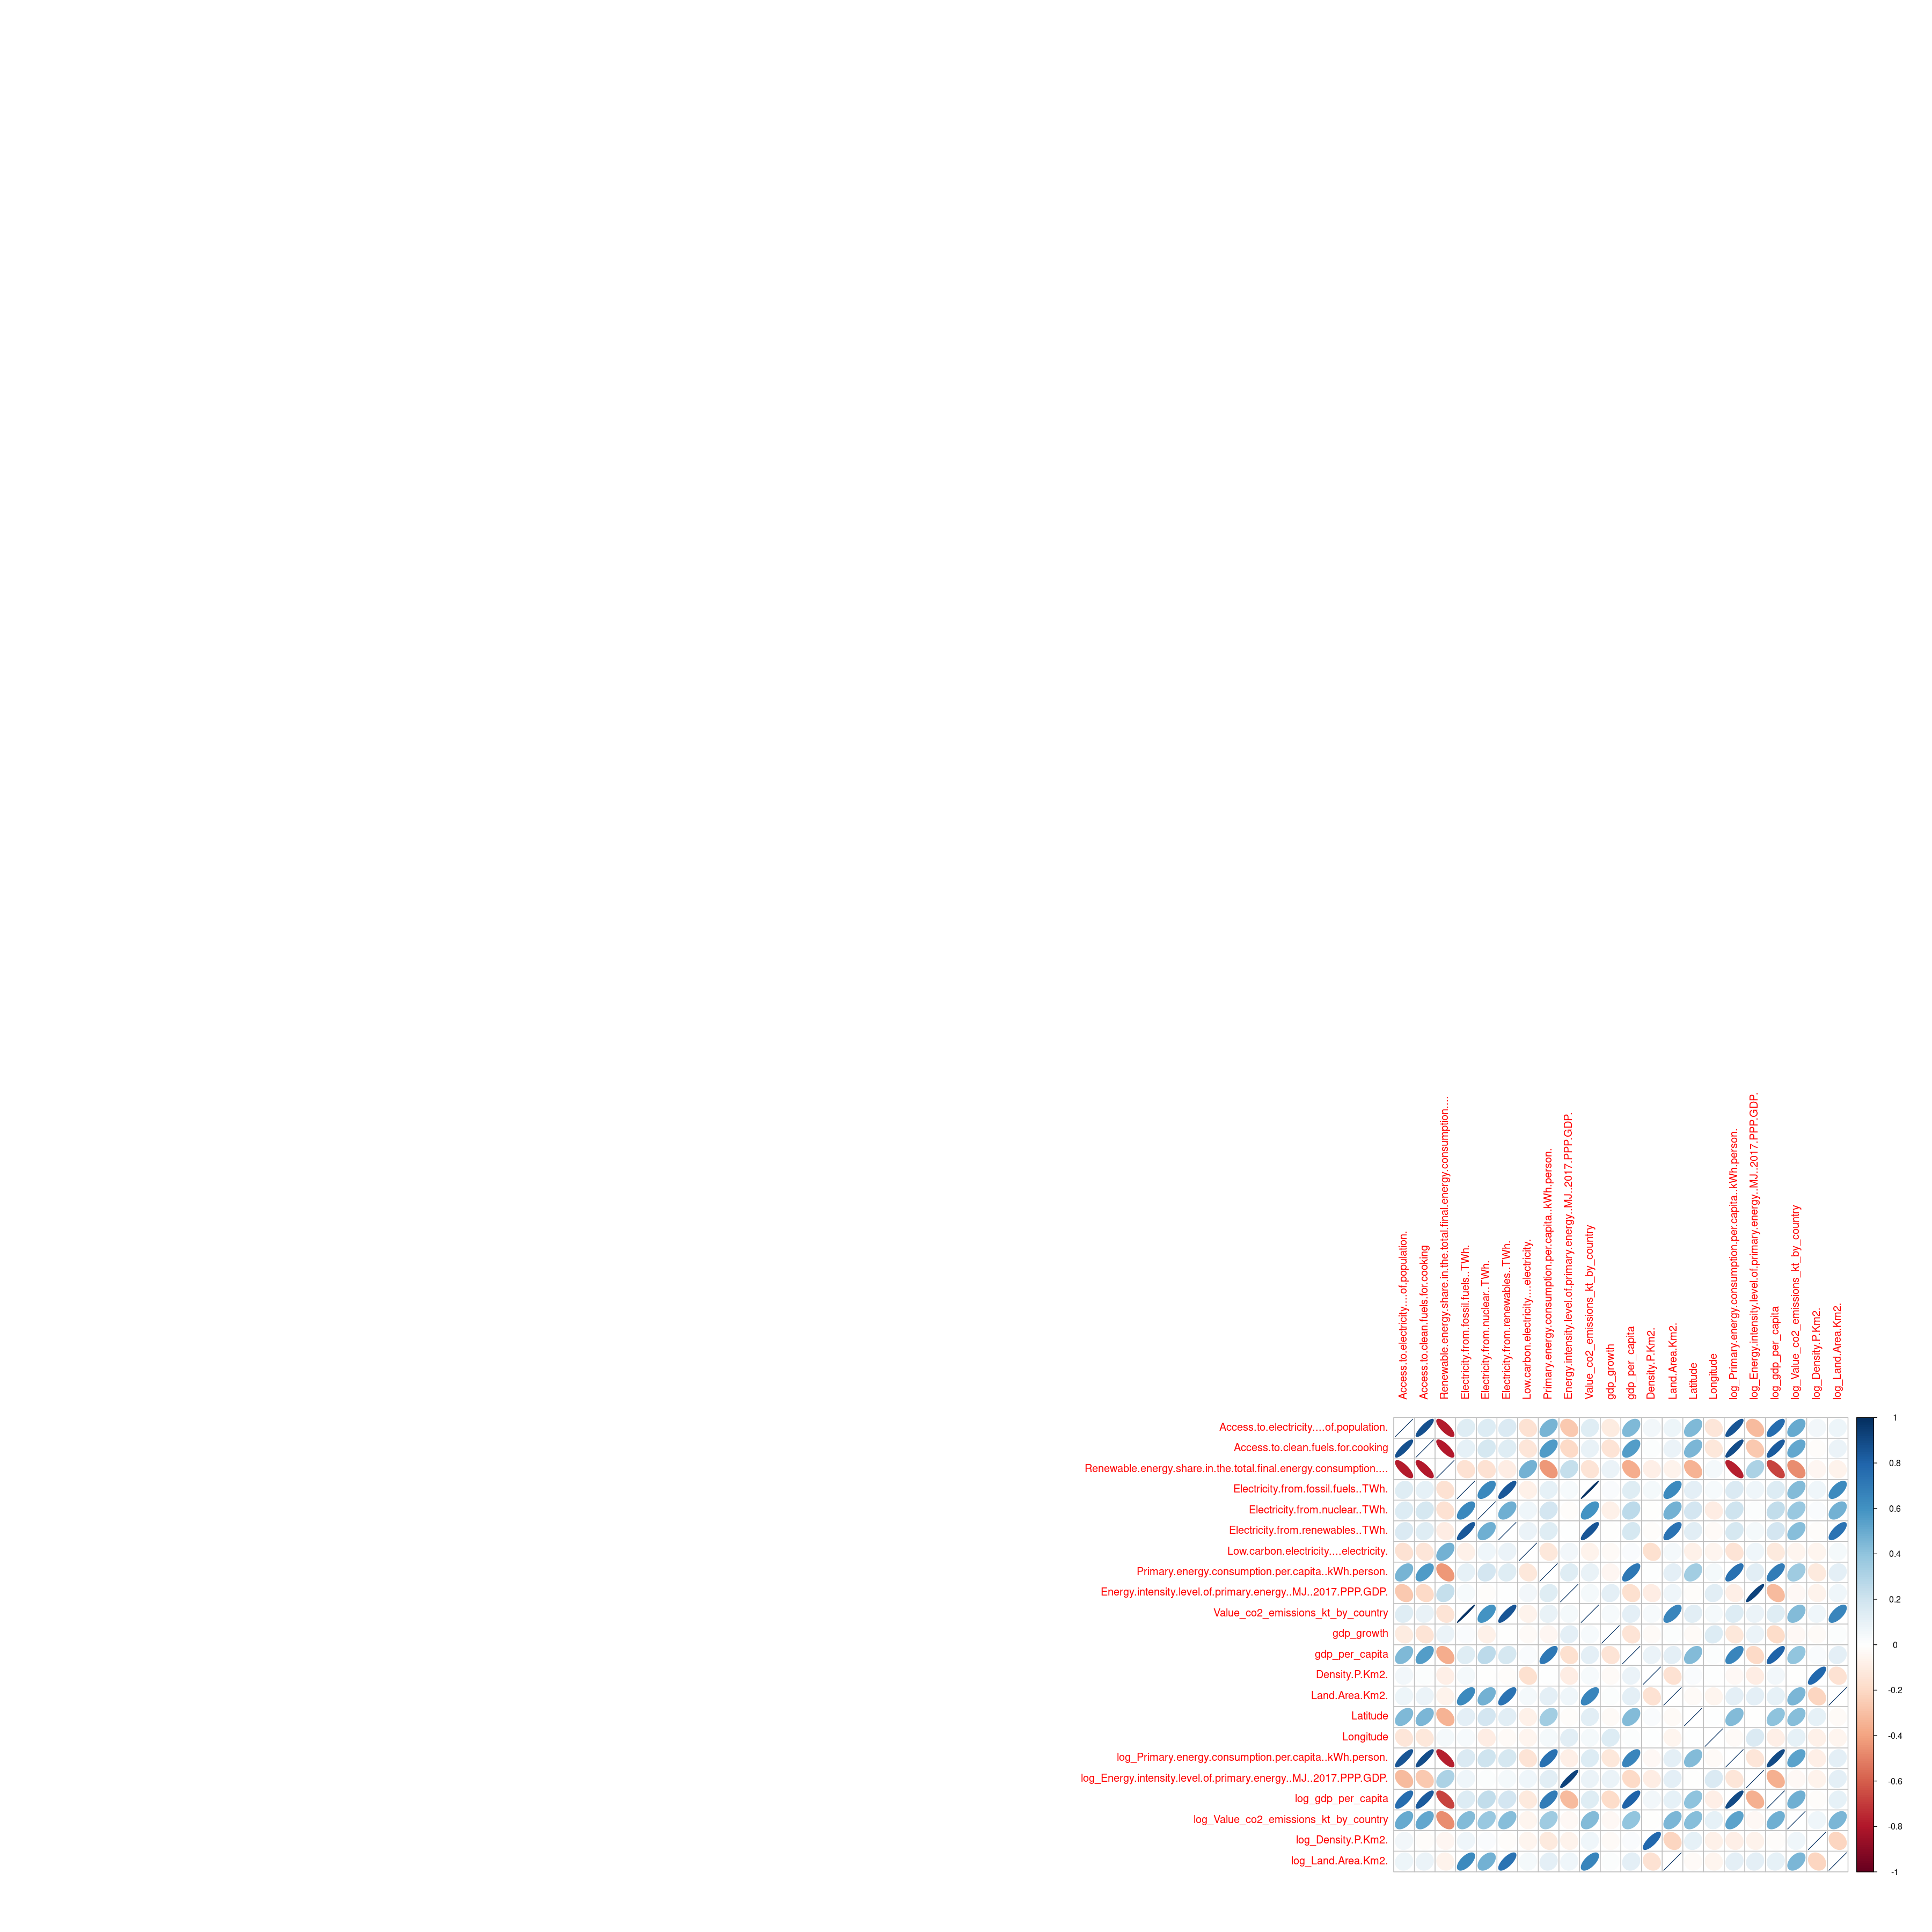

In [25]:
options(repr.plot.width=30, repr.plot.height=30)


cor_matrix <- cor(select(df, -c(1,2))) 

corrplot(cor_matrix,
        method = "ellipse",
        tl.cex = 1)

7. Réalisez une analyse en composantes principales des variables quantitatives et interprétez les résultats

In [26]:
df_norm <- data.frame(scale(select(df, -c(Entity, Year)))) #Standardisation des données

In [27]:
library(FactoMineR)

In [28]:
df_pca <- PCA(df_norm)
print(df_pca)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 2868 individuals, described by 22 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error

In [29]:
summary(df_pca)  


Call:
PCA(X = df_norm) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               6.587   4.214   2.118   1.828   1.295   1.083   0.907
% of var.             29.942  19.155   9.625   8.308   5.887   4.922   4.125
Cumulative % of var.  29.942  49.097  58.722  67.030  72.917  77.839  81.964
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12  Dim.13  Dim.14
Variance               0.830   0.761   0.620   0.521   0.330   0.202   0.160
% of var.              3.773   3.460   2.818   2.369   1.499   0.918   0.728
Cumulative % of var.  85.737  89.197  92.015  94.384  95.883  96.801  97.528
                      Dim.15  Dim.16  Dim.17  Dim.18  Dim.19  Dim.20  Dim.21
Variance               0.145   0.124   0.100   0.077   0.059   0.033   0.007
% of var.              0.657   0.562   0.454   0.352   0.266   0.150   0.031
Cumulative % of var.  98.185  98.747  99.201  99.553  99.819  99.969 100.000
                      Dim.22
Variance

In [30]:
df_pca$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,6.587167e+00,2.994167e+01,29.94167
comp 2,4.214209e+00,1.915550e+01,49.09716
comp 3,2.117548e+00,9.625219e+00,58.72238
comp 4,1.827695e+00,8.307704e+00,67.03009
comp 5,1.295188e+00,5.887220e+00,72.91731
comp 6,1.082749e+00,4.921587e+00,77.83889
comp 7,9.075000e-01,4.125000e+00,81.96389
comp 8,8.301620e-01,3.773464e+00,85.73736
comp 9,7.611251e-01,3.459660e+00,89.19702
comp 10,6.199043e-01,2.817747e+00,92.01476


In [31]:
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



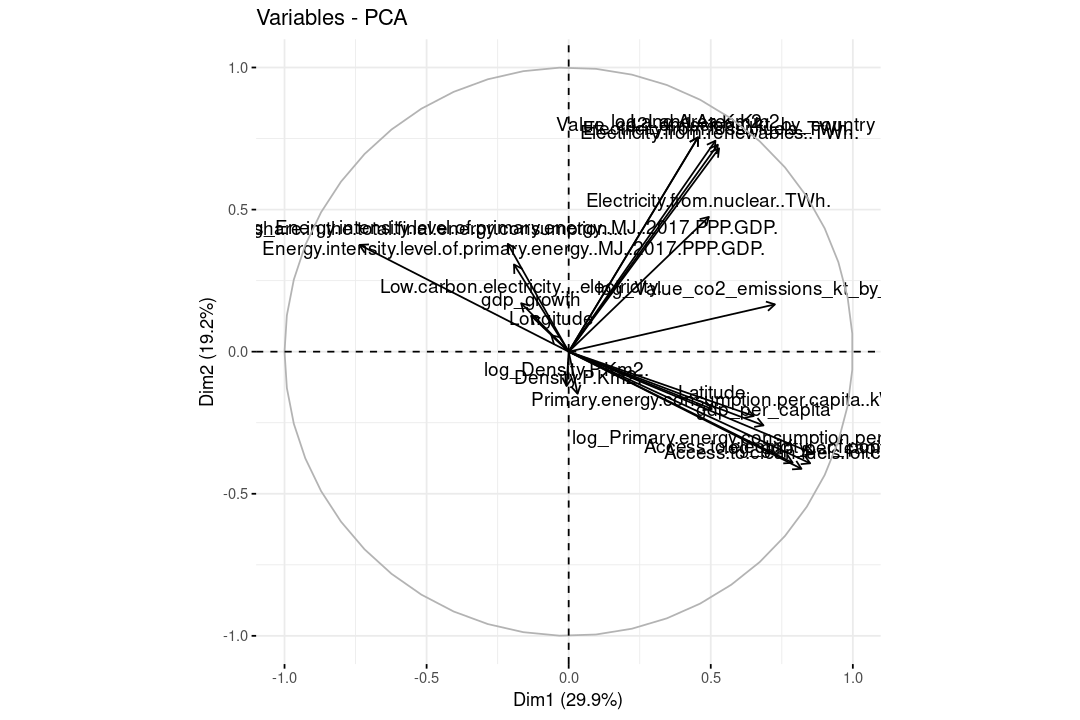

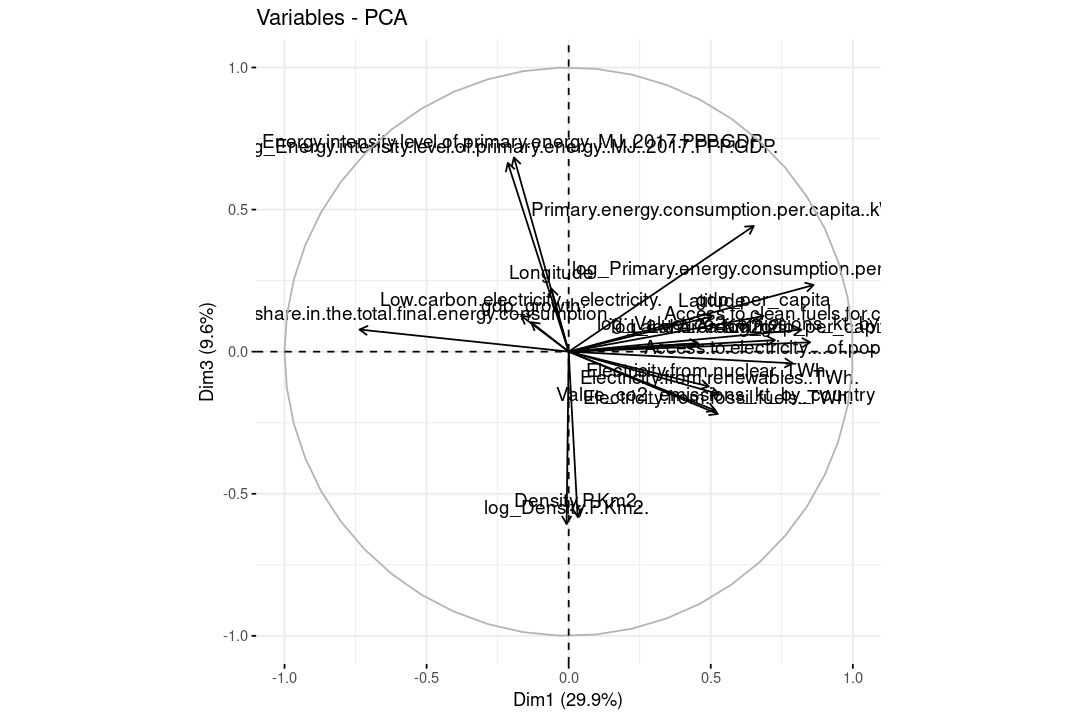

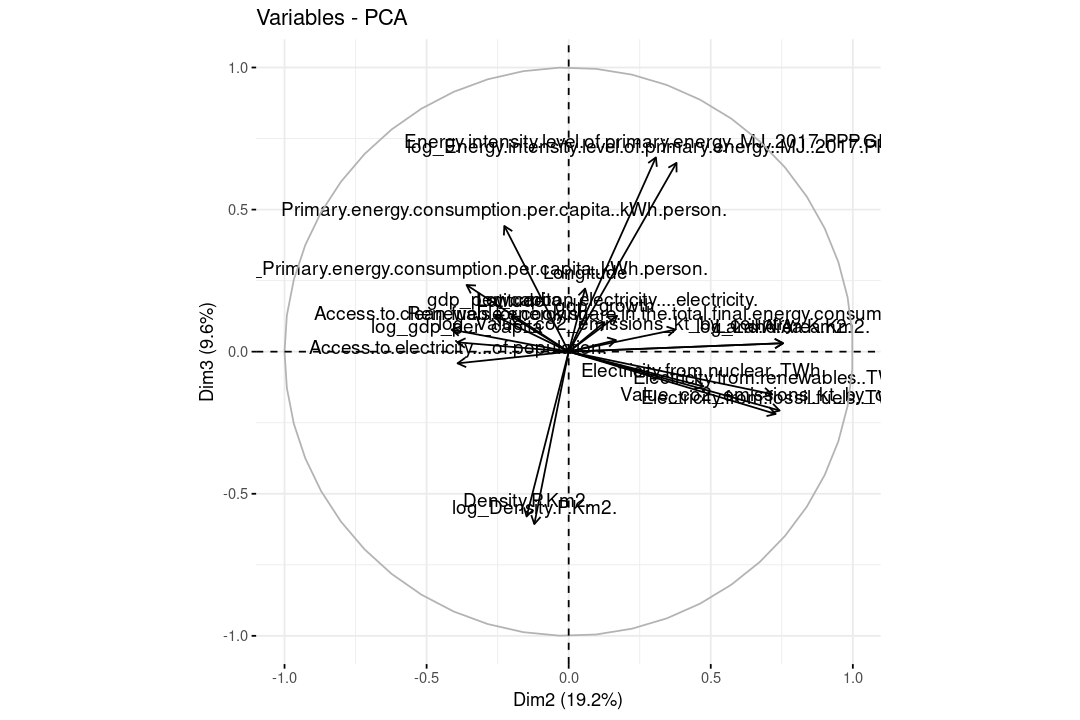

In [32]:
options(repr.plot.width = 9, repr.plot.height = 6)

fviz_pca_var(df_pca)
fviz_pca_var(df_pca, axes=c(1,3))
fviz_pca_var(df_pca, axes=c(2,3))
# à voir

#fviz_pca(df_PCA, axes=c(1,2), geom = c("point"), col.ind="grey")
#fviz_pca(df_PCA, axes=c(1,3), geom = c("point"), col.ind="grey")
#fviz_pca(df_PCA, axes=c(2,3), geom = c("point"), col.ind="grey")

In [33]:
library(viridis)

Le chargement a nécessité le package : viridisLite



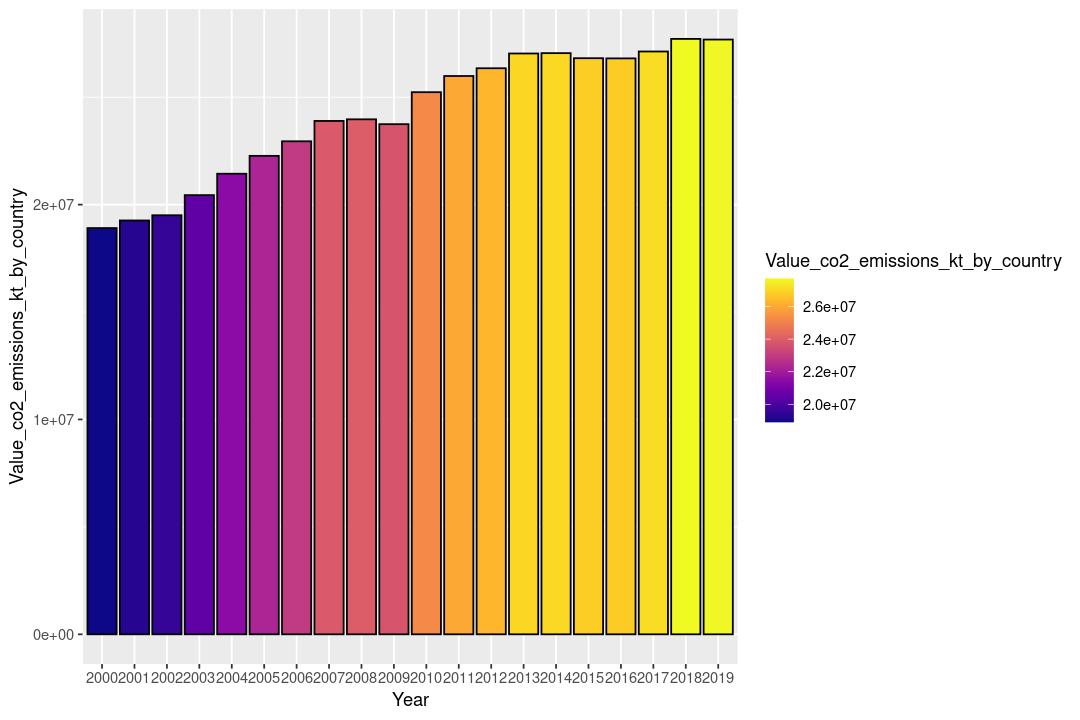

In [34]:
df_somme_annee <- select(df, c(Year, Value_co2_emissions_kt_by_country))
df_somme_annee <- df_somme_annee %>%
    group_by(Year) %>% 
    summarise(Value_co2_emissions_kt_by_country = sum(Value_co2_emissions_kt_by_country))

ggplot(df_somme_annee, aes(x = Year, y = Value_co2_emissions_kt_by_country, fill = Value_co2_emissions_kt_by_country))+
    geom_bar(stat = "identity", color = "black")+
    scale_fill_viridis(option="plasma")

# Modélisation

1. Divisez le jeu de données sans données manquantes en un échantillon d’apprentissage et un échantillon
test. Vous prendrez un pourcentage de 20% pour l’échantillon test. Pourquoi cette étape est-elle nécessaire
lorsque nous nous concentrons sur les performances des algorithmes ?

In [44]:
#df_norm <- data.frame(df_norm)

set.seed(579) # initialisation du générateur

# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test

npop <- nrow(df) # nombre de lignes dans les données
nvar <- ncol(df) # nombre de colonnes

# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio)

# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi)

#On fait un jeu de donnée où Value_co2 est simple
# construction de l'échantillon d'apprentissage
train <- df[appri, -c(5,22)]
# construction de l'échantillon test
test <- df[testi, -c(5,22)]

#On fait un jeu de donnée où Value_co2 est avec log
# construction de l'échantillon d'apprentissage
train_log <- df[appri, -c(5,12)]
# construction de l'échantillon test
test_log <- df[testi, -c(5,12)]
# en R, à la différence de python, on ne différencie pas x_train et y_train

# vérification du contenu des échantillons
str(train)
str(test)


'data.frame':	2294 obs. of  22 variables:
 $ Entity                                                         : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                                                           : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 9 10 11 13 14 15 ...
 $ Access.to.electricity....of.population.                        : num  14.7 20.1 25.4 30.7 42.4 ...
 $ Access.to.clean.fuels.for.cooking                              : num  9.5 10.9 12.2 13.8 16.7 ...
 $ Electricity.from.fossil.fuels..TWh.                            : num  0.31 0.33 0.34 0.2 0.19 0.16 0.19 0.14 0.22 0.16 ...
 $ Electricity.from.nuclear..TWh.                                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                              : num  0.63 0.56 0.59 0.64 0.54 0.78 0.75 0.74 0.89 1 ...
 $ Low.carbon.electricity....electricity.                         : num  67 62.9 63.4 76.2 74 ...
 $ Primary.energy.consumption.per.capita..kW

2. Comparez les performances d’un modèle de régression linéaire avec/sans sélection de variables, avec/sans pénalisation, d’un SVM, d’un arbre optimal, d’une forêt aléatoire, du boosting, et de réseaux de neurones. Justifiez vos choix (par exemple le noyau pour le SVM), et ajustez soigneusement les paramètres (par validation croisée). Interprétez les résultats et quantifiez l’amélioration éventuelle apportée par les modèles non linéaires.

2. a) Modèle de régression linéaire sans pénalisation

Pour un modèle de régression linéaire, seules les variables quantitatives interviennent. C'est pour cela que nous décidons de retirer les colonnes 'Entity' et 'Year' du jeu de données.

In [42]:
gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

In [45]:
# construction de l'échantillon d'apprentissage
train <- df[appri, -c(1,2,5,22)]
# construction de l'échantillon test
test <- df[testi, -c(1,2,5,22)]

# construction de l'échantillon d'apprentissage
train_log <- df[appri, -c(1,2,5,12)]
# construction de l'échantillon test
test_log <- df[testi, -c(1,2,5,12)]

On créé un modèle afin de prédire, dans un premier temps, 'Value_co2_emissions_kt_by_country'.

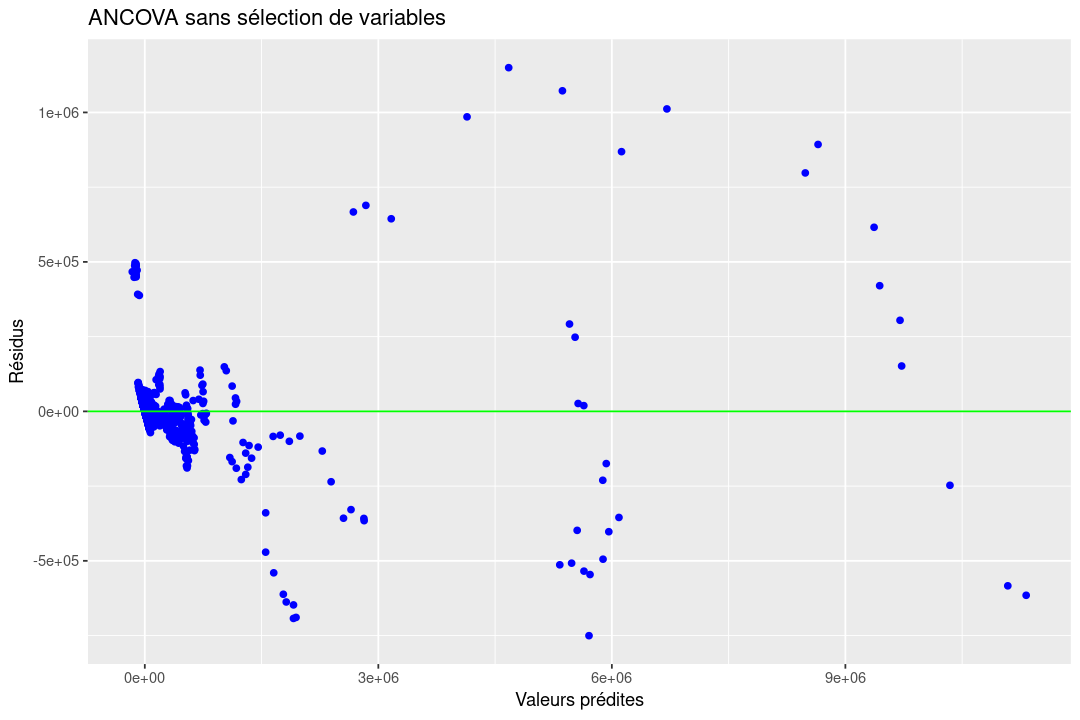

In [60]:
# estimation du modèle sans interaction
reg <- aov(Value_co2_emissions_kt_by_country ~ . , data = train)

# Extraction des résidus et des valeurs ajustées de ce modèle
res <- reg$residuals
fit<- reg$fitted.values

# Graphe des résidus. 
gplot.res(fit,res,"ANCOVA sans sélection de variables")


In [63]:
#summary(reg)

In [50]:
coef(reg)

(Intercept) 
                                                  -2.045338e+05 
                        Access.to.electricity....of.population. 
                                                   1.227341e+02 
                              Access.to.clean.fuels.for.cooking 
                                                  -5.790829e+02 
                            Electricity.from.fossil.fuels..TWh. 
                                                   2.114166e+03 
                                 Electricity.from.nuclear..TWh. 
                                                  -6.709654e+02 
                              Electricity.from.renewables..TWh. 
                                                   2.501067e+02 
                         Low.carbon.electricity....electricity. 
                                                   3.816980e+02 
             Primary.energy.consumption.per.capita..kWh.person. 
                                                  -5.777354e-02 
    Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 
                                                   3.573087e+03 
                                                     gdp_growth 
                                                   9.574442e+02 
                                                 gdp_per_capita 
                                                  -1.189022e+00 
                                                 Density.P.Km2. 
                                                  -7.737690e+01 
                                                 Land.Area.Km2. 
                                                   2.546583e-02 
                                                       Latitude 
                                                   6.879501e+02 
                                                      Longitude 
                                                   4.869972e+00 
         log_Primary.energy.consumption.per.capita..kWh.person. 
                                                   1.137509e+04 
log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 
                                                  -1.522306e+04 
                                             log_gdp_per_capita 
                                                   7.765855e+03 
                                             log_Density.P.Km2. 
                                                   1.328108e+04

De la même manière, on créé un modèle pour prédire la transformée logarithmique de 'Value_co2_emissions_kt_by_country'.

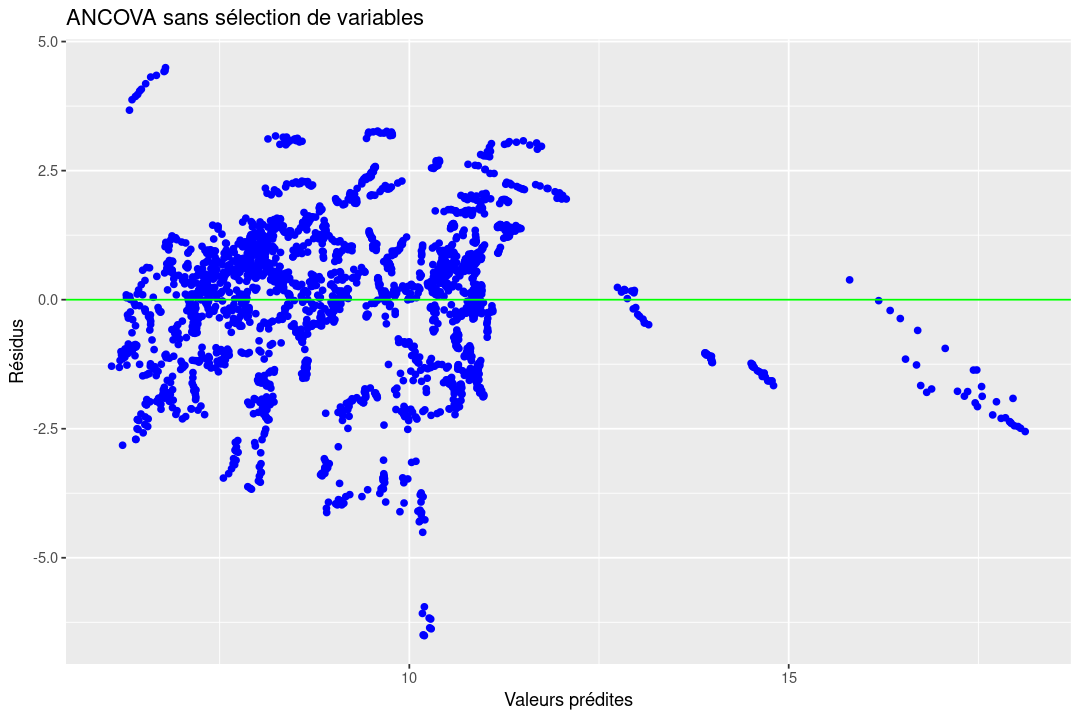

In [65]:
# estimation du modèle sans interaction
reg <- aov(log_Value_co2_emissions_kt_by_country ~ . , data = train_log)

# Extraction des résidus et des valeurs ajustées de ce modèle
res <- reg$residuals
fit<- reg$fitted.values

# Graphe des résidus. 
gplot.res(fit,res,"ANCOVA sans sélection de variables")


2. b) Modèle linaire avec pénalisation LASSO 

In [66]:
library(glmnet)

Le chargement a nécessité le package : Matrix


Attachement du package : ‘Matrix’


Les objets suivants sont masqués depuis ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8



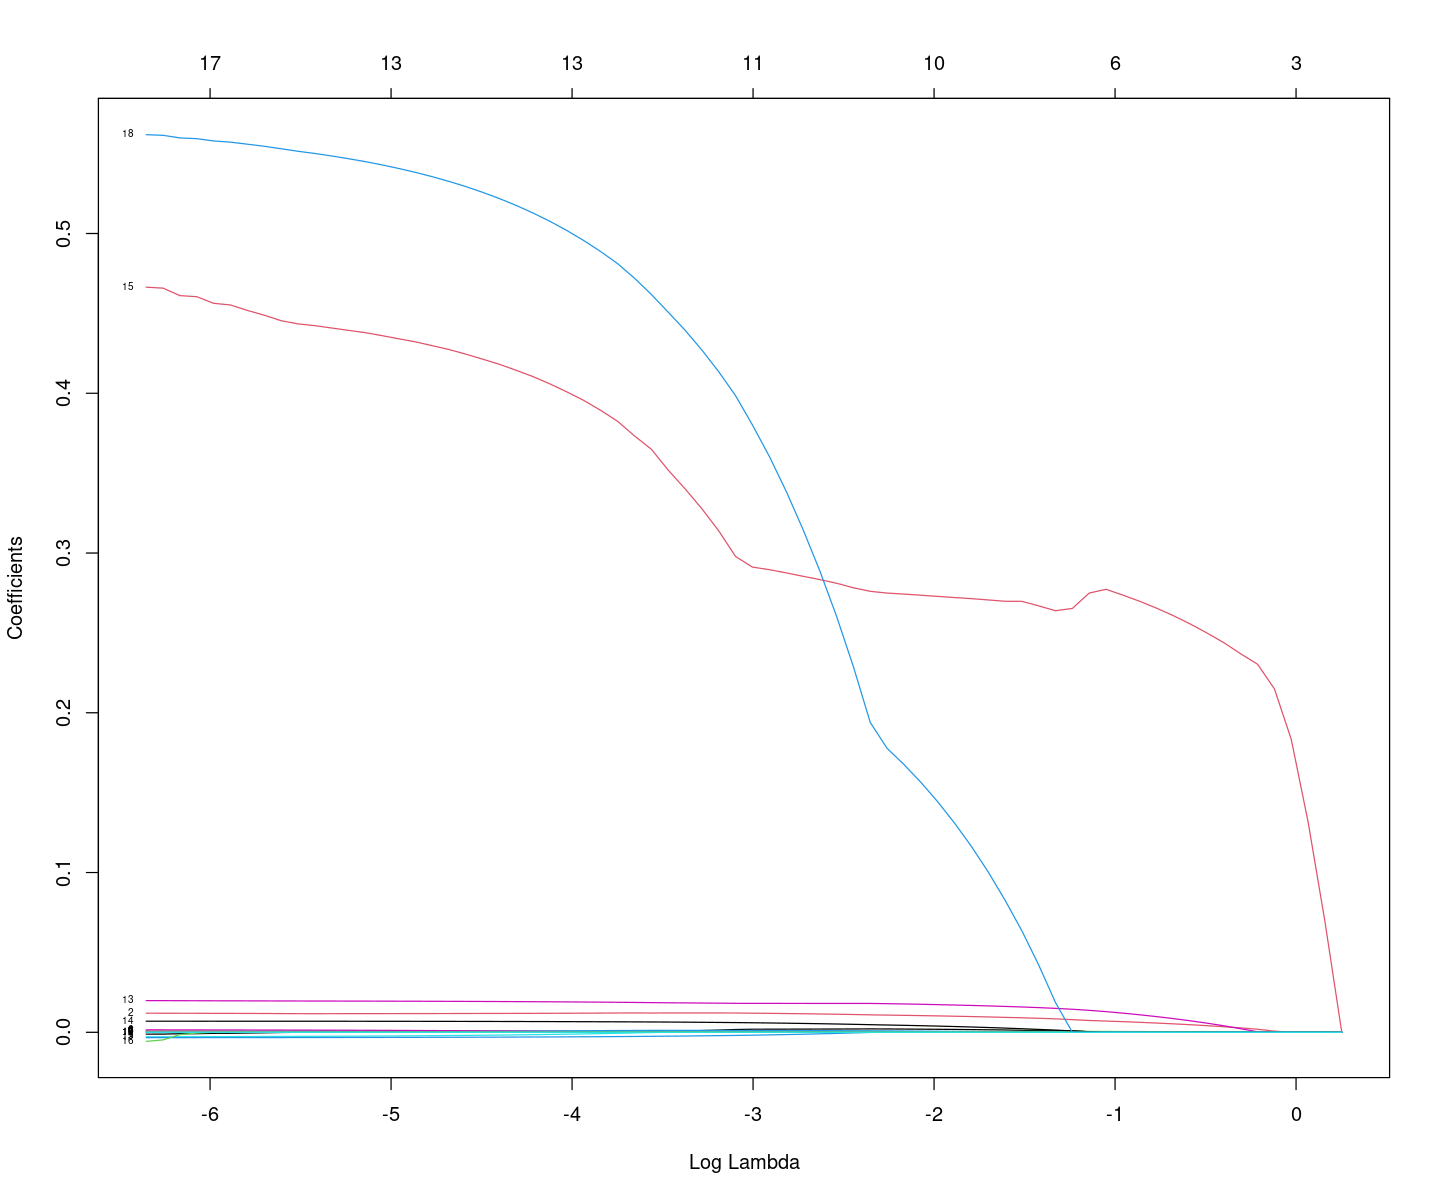

In [68]:
train_log.mat <- model.matrix(log_Value_co2_emissions_kt_by_country ~ . - 1, data = train_log) #on retire l'intercept du modèle 

# avec des variables quantitatives seulement
regLasso <- glmnet(y = train_log$log_Value_co2_emissions_kt_by_country ,
                           x = train_log.mat )

options(repr.plot.width = 12, repr.plot.height = 10)
plot(regLasso, xvar = "lambda", label = TRUE)
#legend("topright", legend = paste(1:ncol(df.mat), " - ", colnames(df.mat)))


Les chemins de régularisation permettent de comprendre comment les coefficients évoluent en fonction du paramètre de régularisation (lambda). Si les coefficients sont gardés non nul pour une valeur de lambda élévée alors c'est qu'ils sont importants. Ici 2 coefficients semblent sortir du lot.

Nous allons choisir le lambda optimal par validation croisée

[1] 2.358886 2.429594

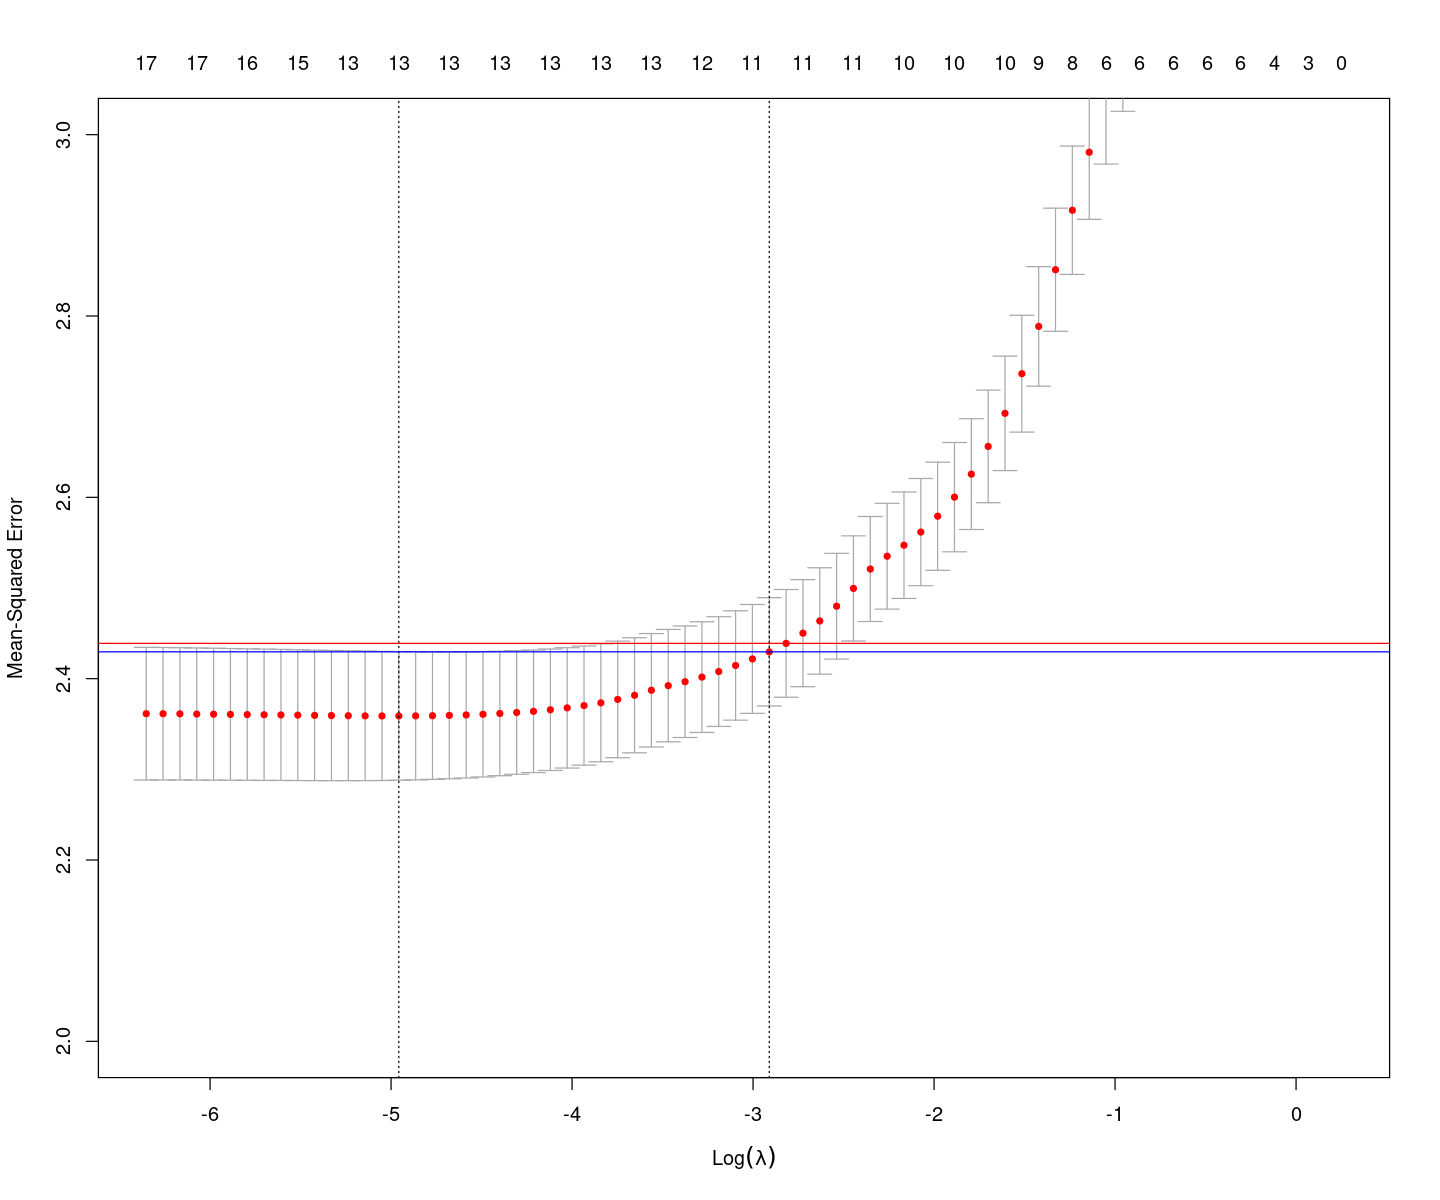

In [80]:
regLassOpt <- cv.glmnet(y = train_log$log_Value_co2_emissions_kt_by_country , x = train_log.mat)
regLassOpt$cvm[c(regLassOpt$index)]

plot(regLassOpt, ylim=c(2,3))
abline(h=regLassOpt$cvm[c(regLassOpt$index)[2]-1], col='red');
abline(h=regLassOpt$cvm[c(regLassOpt$index)[2]], col='blue');


In [85]:
# valeur estimée
paste("1er lambda sélectionné pour modèle optimal:", round(regLassOpt$lambda.1se, 5))
# modèle correspondant
coef(regLassOpt, s = "lambda.1se")

[1] "1er lambda sélectionné pour modèle optimal: 0.05445"

20 x 1 sparse Matrix of class "dgCMatrix"
                                                                           s1
(Intercept)                                                      3.693370e+00
Access.to.electricity....of.population.                          1.936416e-03
Access.to.clean.fuels.for.cooking                                1.184829e-02
Electricity.from.fossil.fuels..TWh.                              2.802380e-04
Electricity.from.nuclear..TWh.                                   1.114022e-03
Electricity.from.renewables..TWh.                                .           
Low.carbon.electricity....electricity.                           .           
Primary.energy.consumption.per.capita..kWh.person.               .           
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.      .           
gdp_growth                                                       .           
gdp_per_capita                                                   .           
Density.P.Km2.        

In [86]:
# valeur estimée
paste("2ème lambda sélectionné pour modèle optimal:", round(regLassOpt$lambda.min, 3))
# modèle correspondant
coef(regLassOpt, s = "lambda.min")

[1] "2ème lambda sélectionné pour modèle optimal: 0.007"

20 x 1 sparse Matrix of class "dgCMatrix"
                                                                           s1
(Intercept)                                                      1.979048e+00
Access.to.electricity....of.population.                          .           
Access.to.clean.fuels.for.cooking                                1.170093e-02
Electricity.from.fossil.fuels..TWh.                              6.776087e-04
Electricity.from.nuclear..TWh.                                   6.875587e-04
Electricity.from.renewables..TWh.                               -2.266673e-03
Low.carbon.electricity....electricity.                           1.168339e-03
Primary.energy.consumption.per.capita..kWh.person.              -4.222929e-06
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.      .           
gdp_growth                                                       .           
gdp_per_capita                                                   .           
Density.P.Km2.        

Affichage des résidus en fonction des valeurs prédites

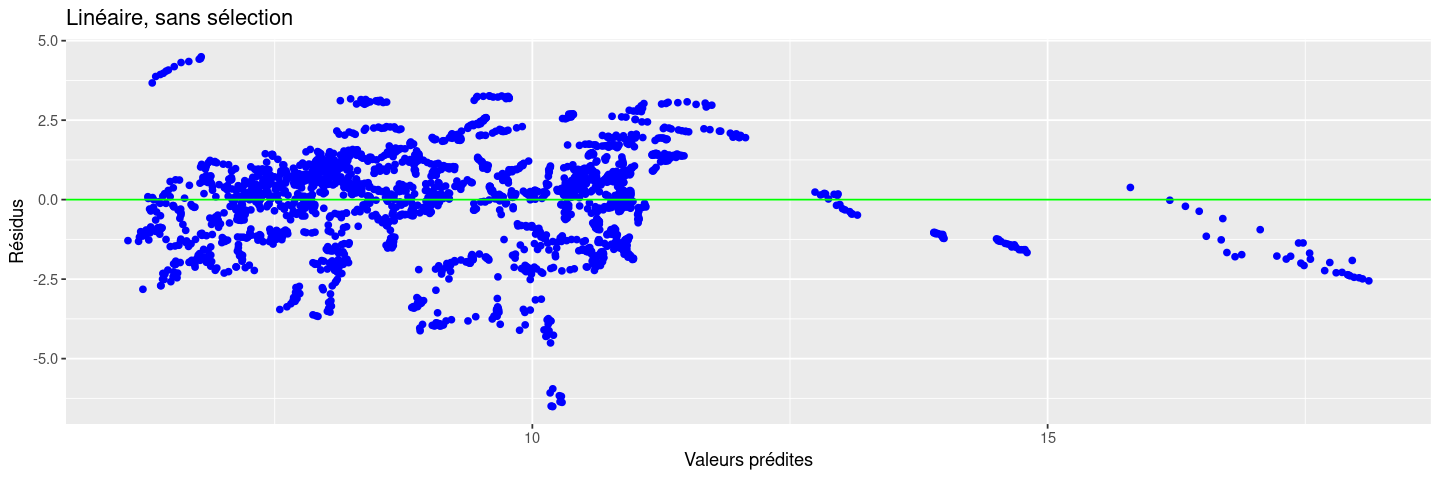

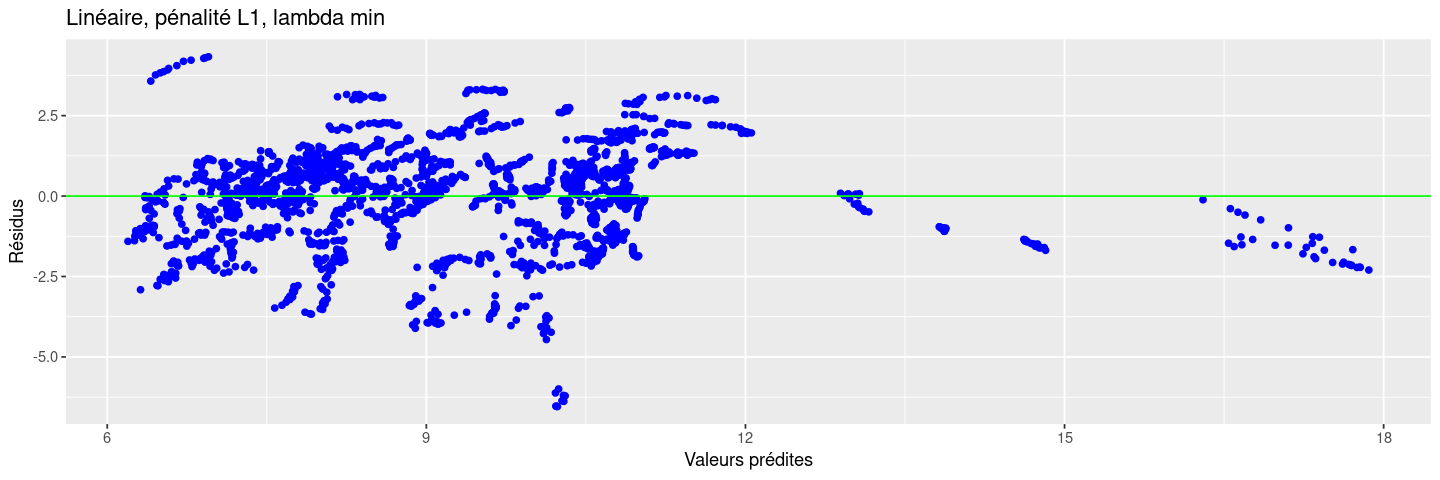

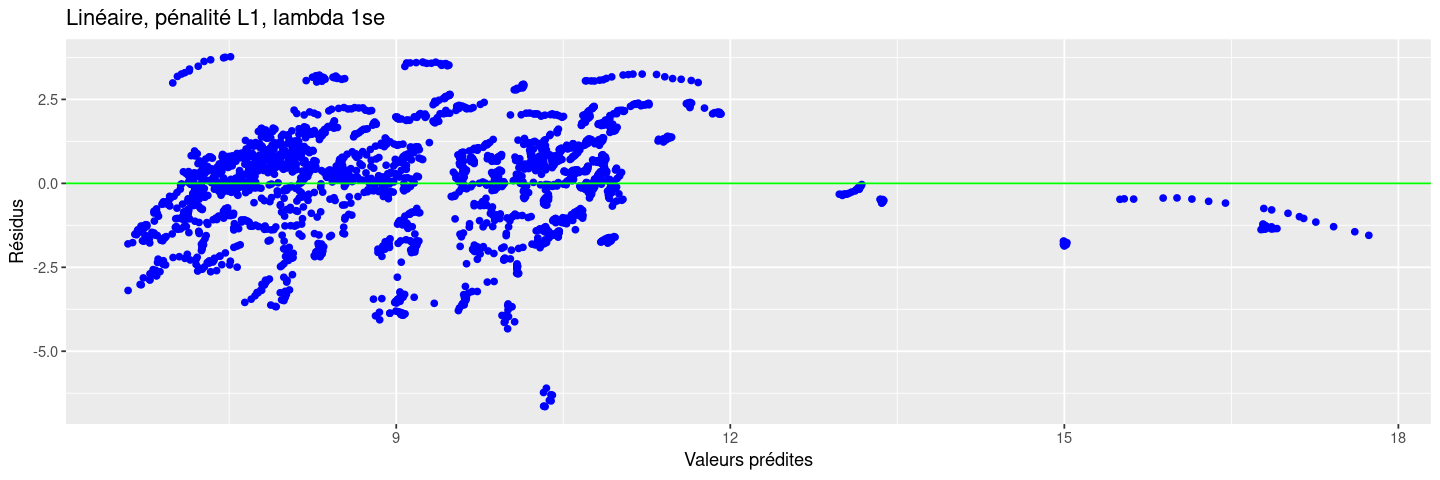

In [89]:
# Extraction des valeurs ajustées et des résidus

fit.lasso <- predict(regLassOpt, s = "lambda.min", newx = train_log.mat)
res.lasso <- train_log$log_Value_co2_emissions_kt_by_country - fit.lasso

fit.lasso.1se <- predict(regLassOpt, s = "lambda.1se", newx = train_log.mat)
res.lasso.1se <- train_log$log_Value_co2_emissions_kt_by_country - fit.lasso.1se 

# Graphe des résidus
options(repr.plot.width = 12, repr.plot.height = 4)
par(mfrow = c(1, 4))
gplot.res(fit, res, "Linéaire, sans sélection")
gplot.res(fit.lasso, res.lasso, "Linéaire, pénalité L1, lambda min")
gplot.res(fit.lasso.1se, res.lasso.1se, "Linéaire, pénalité L1, lambda 1se") 

In [90]:
#Calcul du critère MSE 
paste("Modèle linéaire sans sélection:",mean(res^2))
paste("LASSO avec lambda.min:",mean(res.lasso^2))
paste("LASSO avec lambda.1se:",mean(res.lasso.1se^2))

[1] "Modèle linéaire sans sélection: 2.32721446640777"

[1] "LASSO avec lambda.min: 2.33034897697176"

[1] "LASSO avec lambda.1se: 2.40733171221681"

## Support Vector Machine (SVM)

In [ ]:
#penser à standardiser les données

## ARBRE DE REGRESSION


In [91]:
library(rpart)
library(rpart.plot)

données non standardisées

Je renomme mes variables pour que l'affichage soit plus jolie

In [110]:
Train_log_renom <- train_log
Test_log_renom <- train_log

Nouveaux_noms <- c("Access_electricity", "Access_clean_fuels", "Electricity_fossil", "Electricity_nuclear",
                "Electricity_renewables", "Low_carbon_electricity", "Primary_energy_consumption_per_capita",
                "Energy_intensity", "GDP_growth", "GDP_per_capita", "Density", "Land_area", "Latitude",
                "Longitude", "Log_primary_energy_consumption_per_capita", "Log_energy_intensity",
                "Log_gdp_per_capita", "Log_CO2_emissions", "Log_density", "Log_land_area")

names(Train_log_renom) <- Nouveaux_noms
names(Test_log_renom) <- Nouveaux_noms

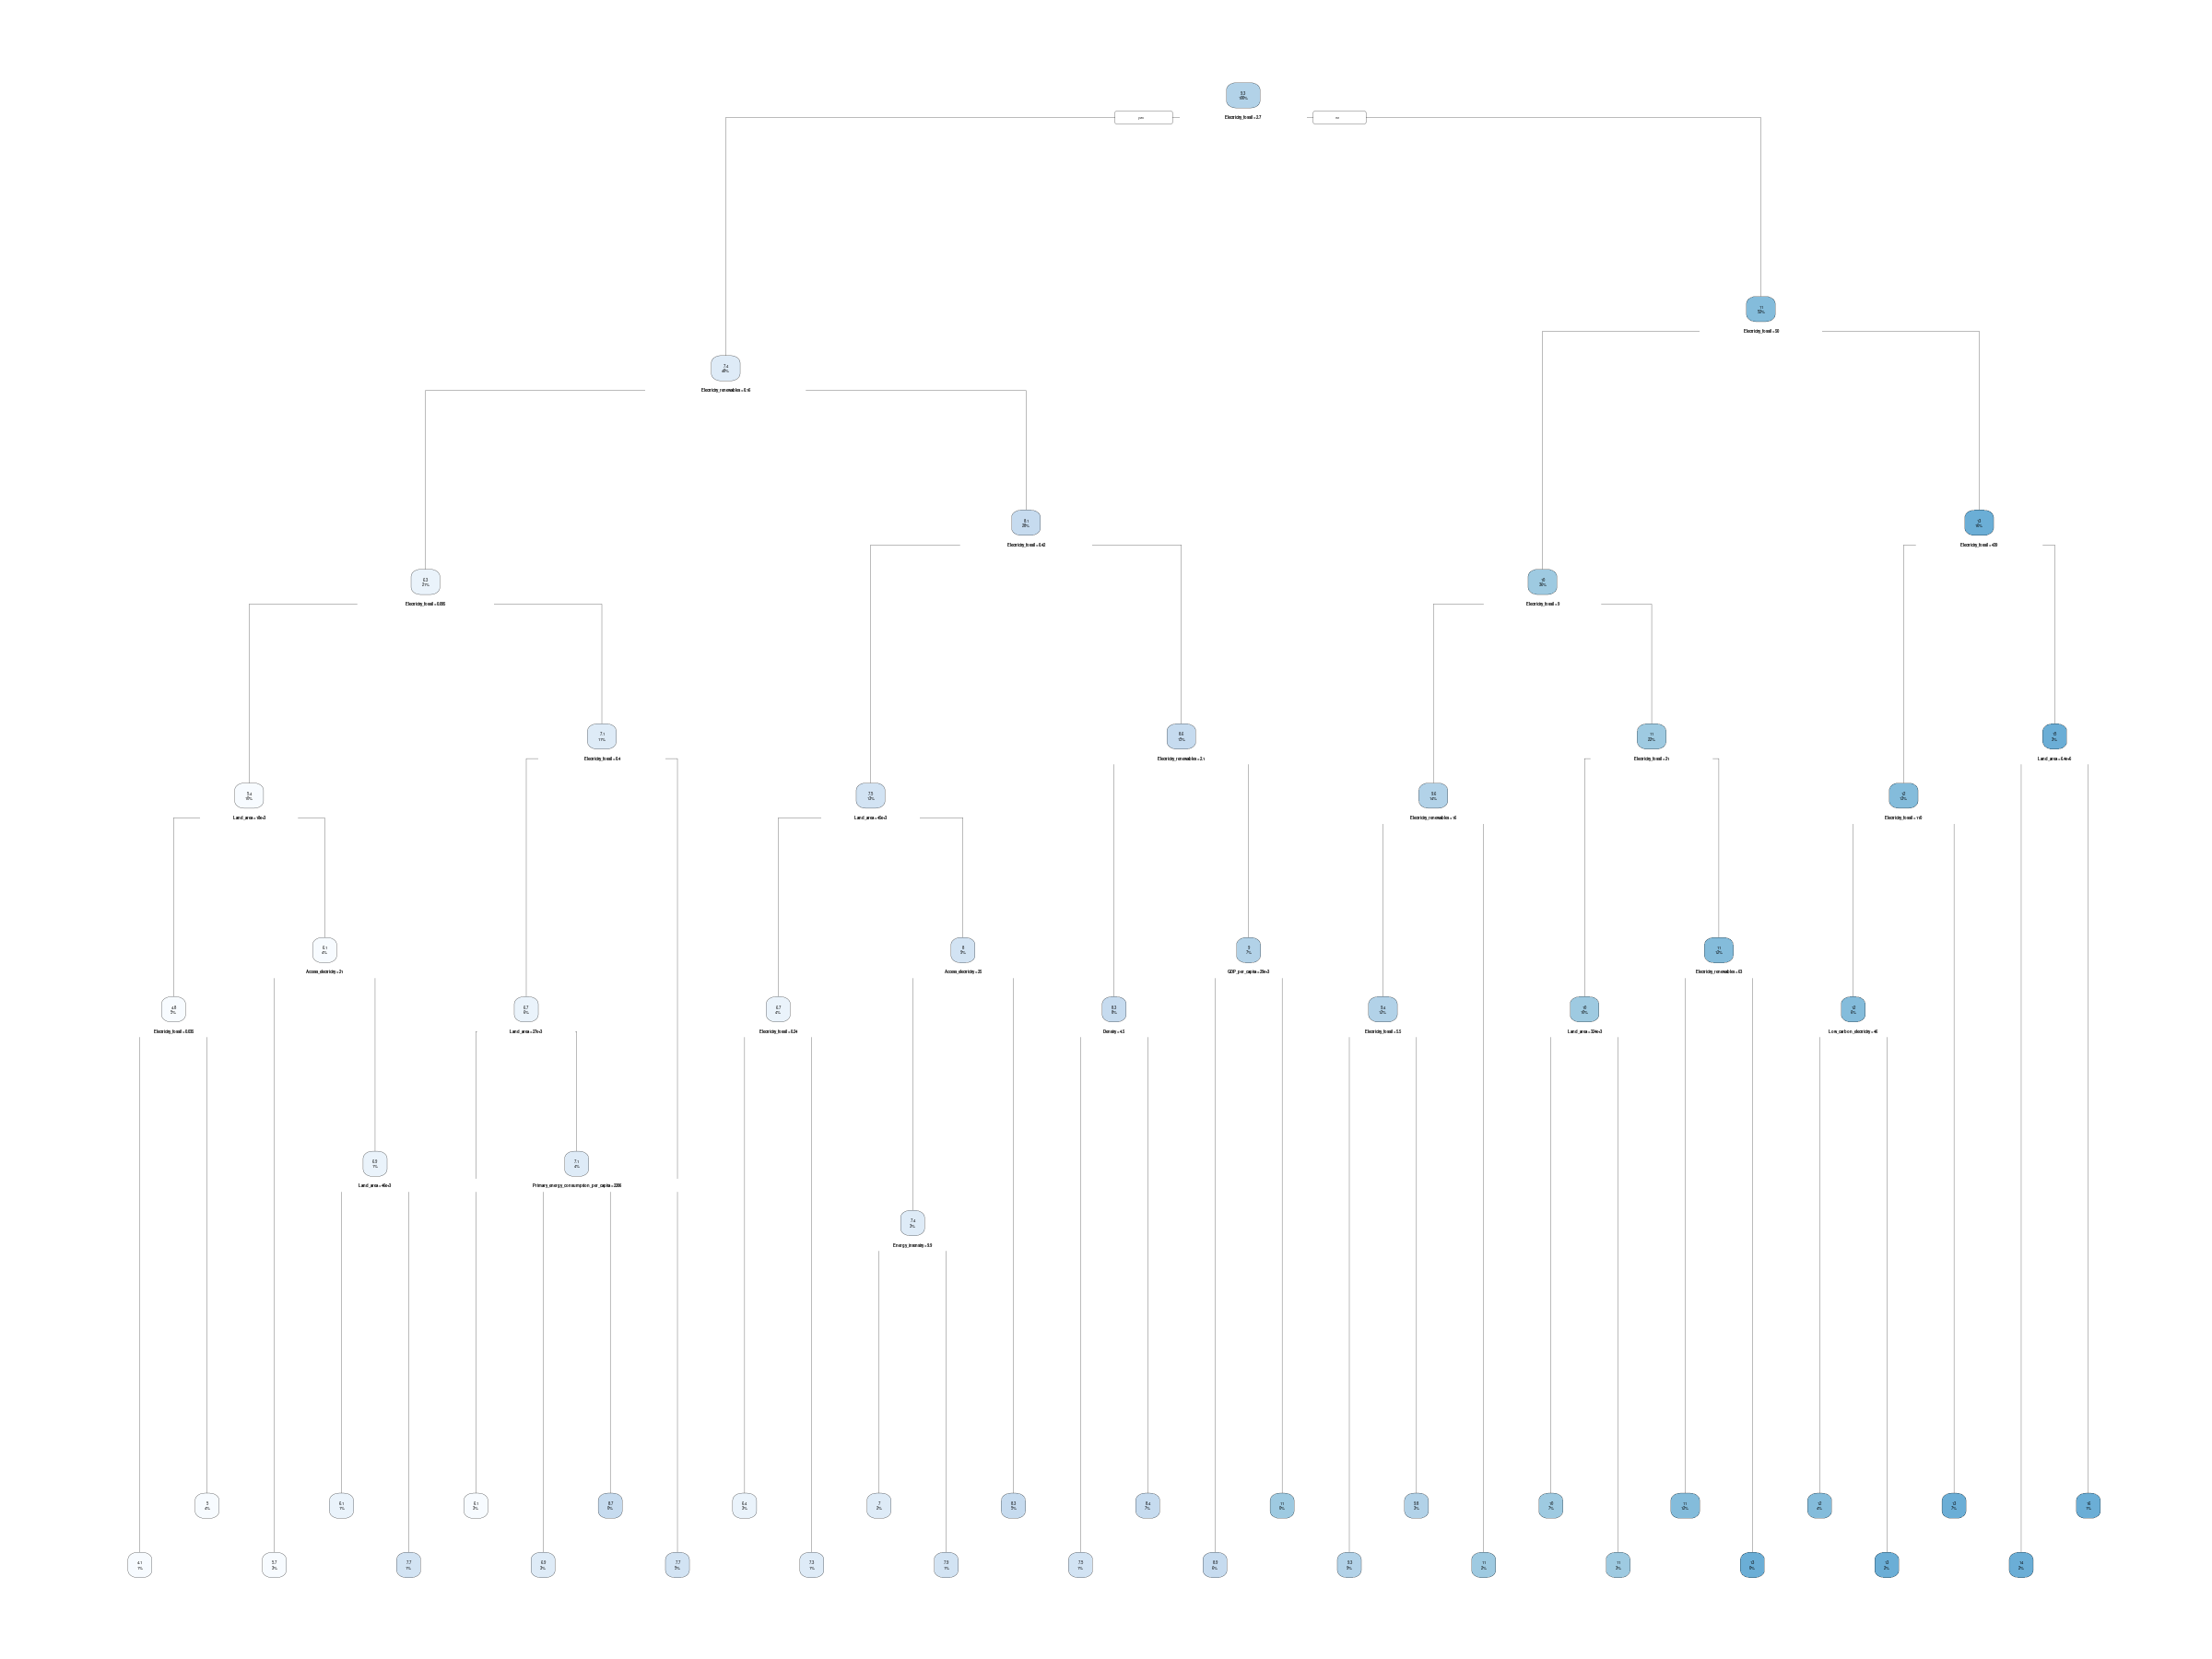

In [98]:
tree=rpart(Log_CO2_emissions~.,data=Train_log_renom,control=rpart.control(cp=0.001))
#Affichage du graphe de l'arbre
options(repr.plot.width = 20, repr.plot.height = 15)
rpart.plot(tree)

Réduction des branches de l'arbre par validation croisée

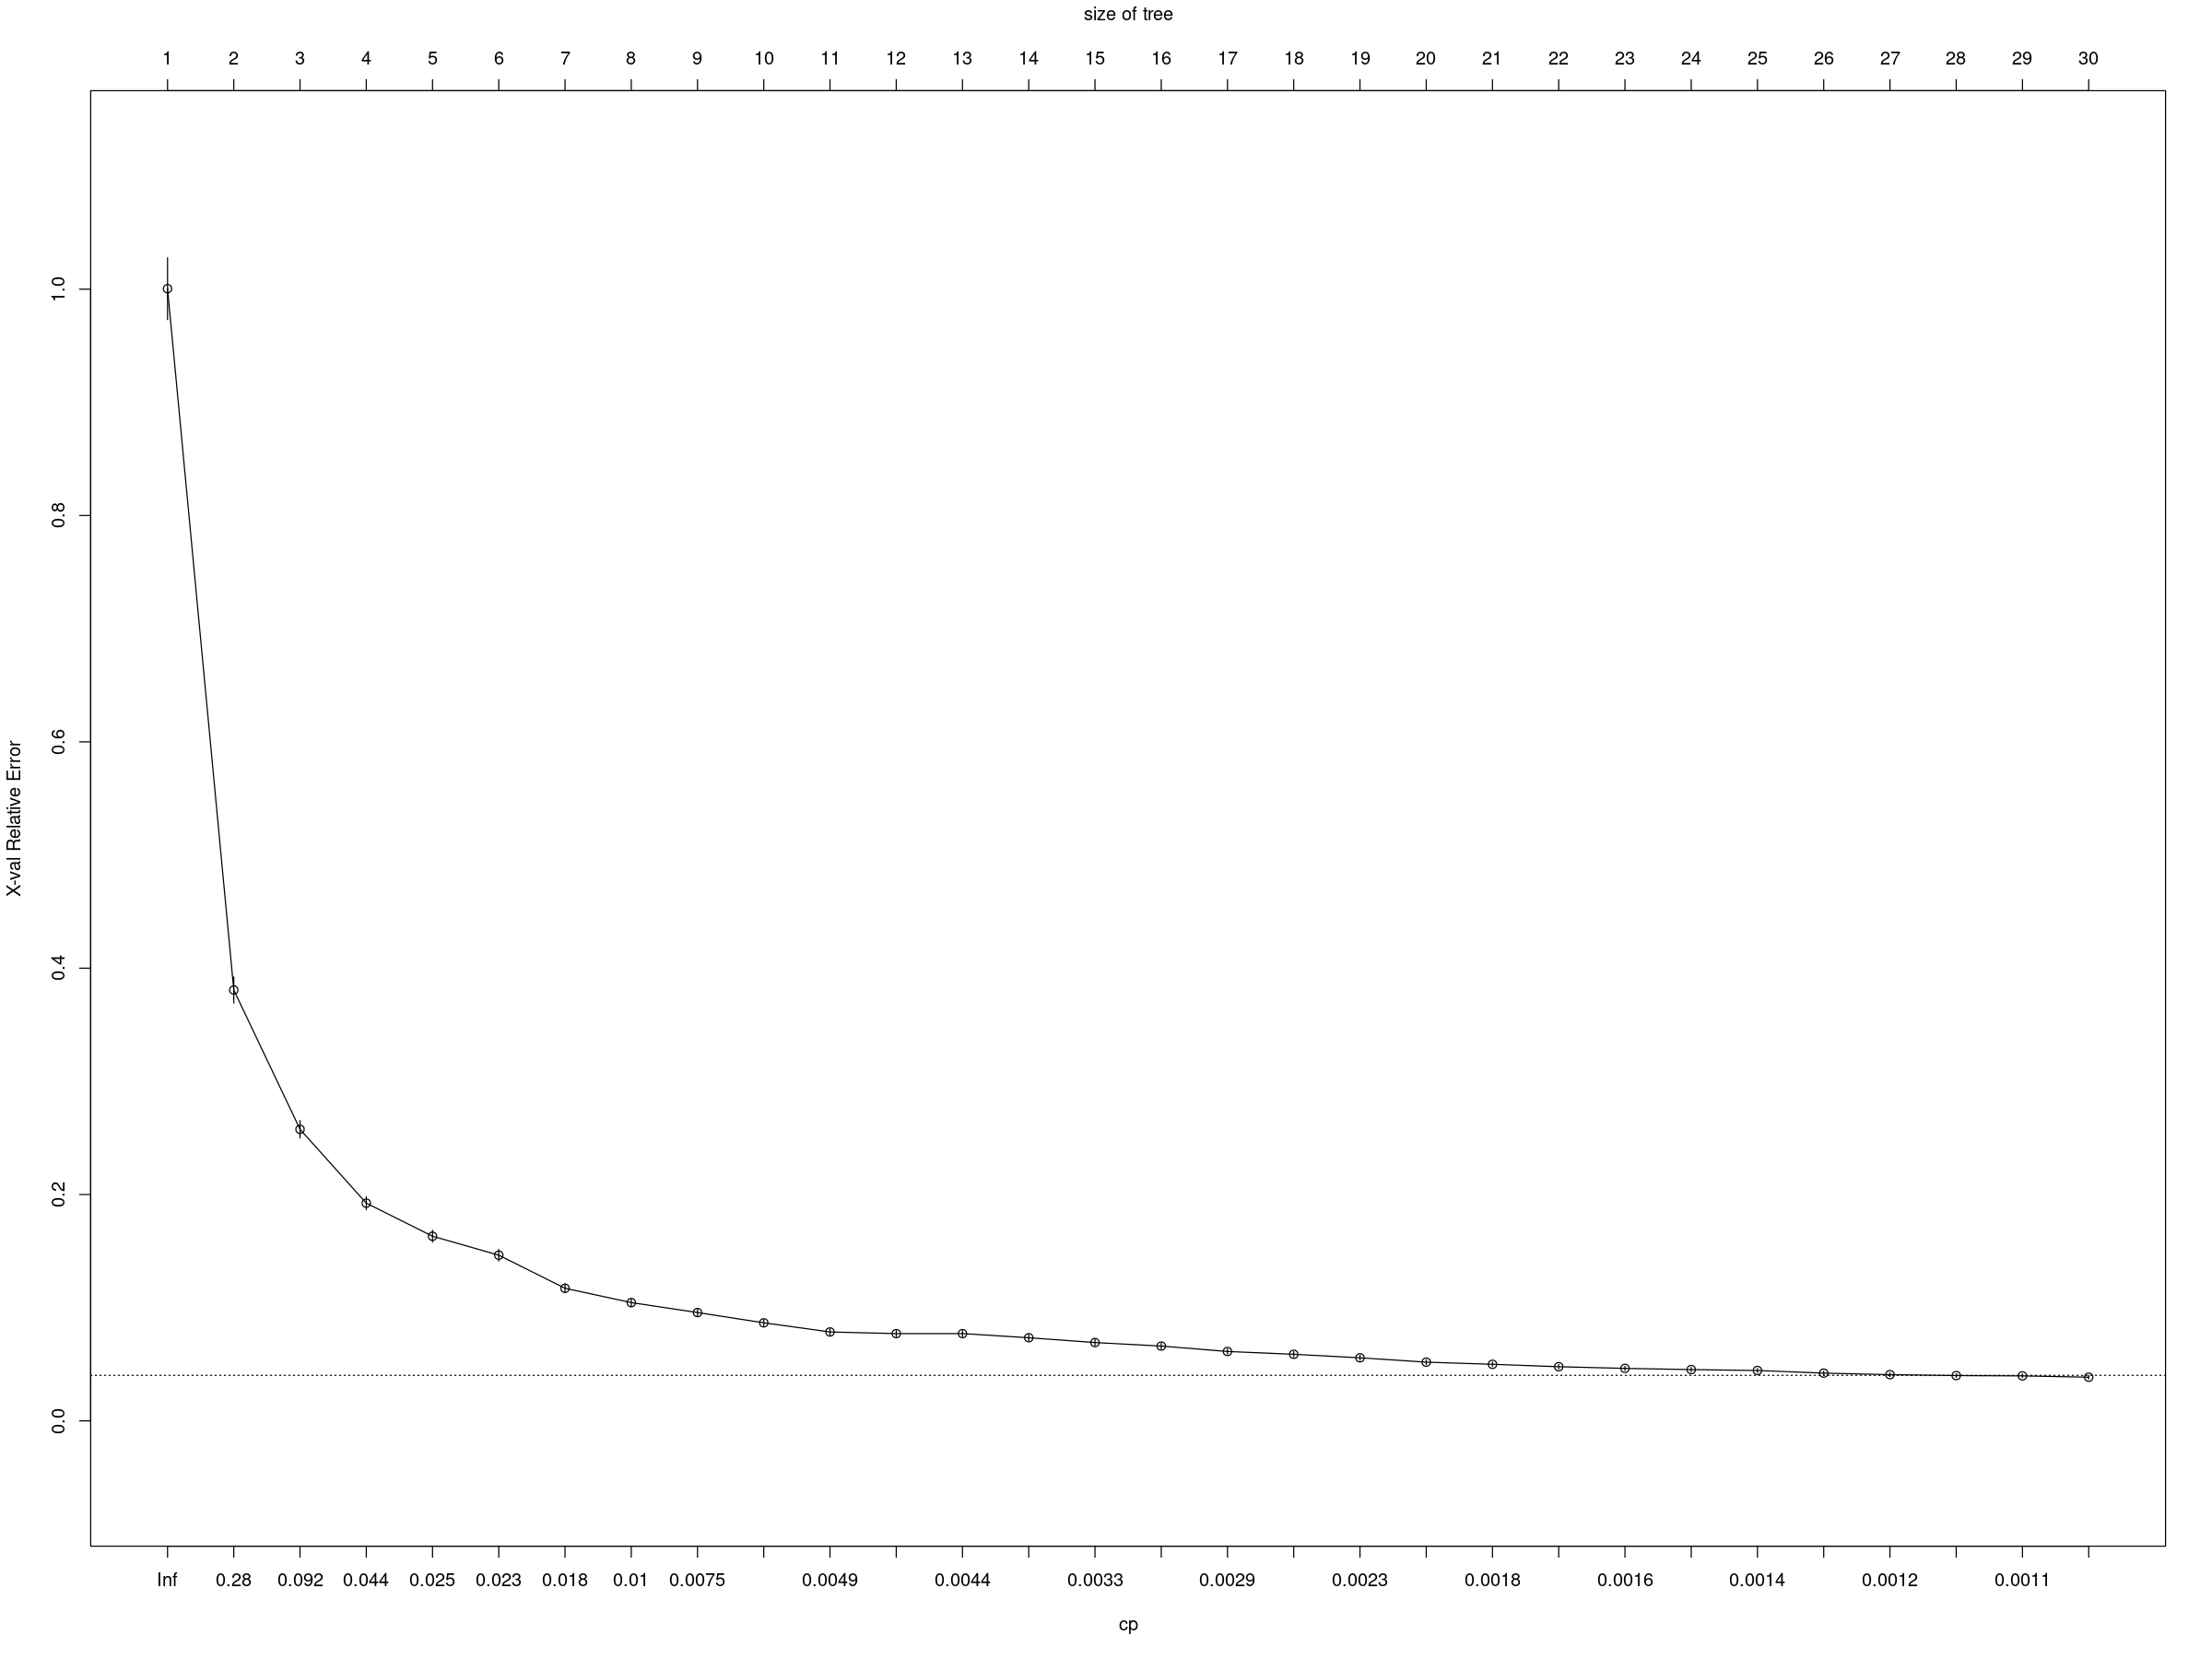

In [100]:
xdf<-xpred.rpart(tree,xval=10) 

# Cross-validation error par valeur de CP
CVerr<-apply((xdf-Train_log_renom$Log_CO2_emissions)^2,2,sum)

plotcp(tree)

On veut la valeur du cp qui correspond à la plus petite erreur.

[1] "cp optimisé: 0.001019211"


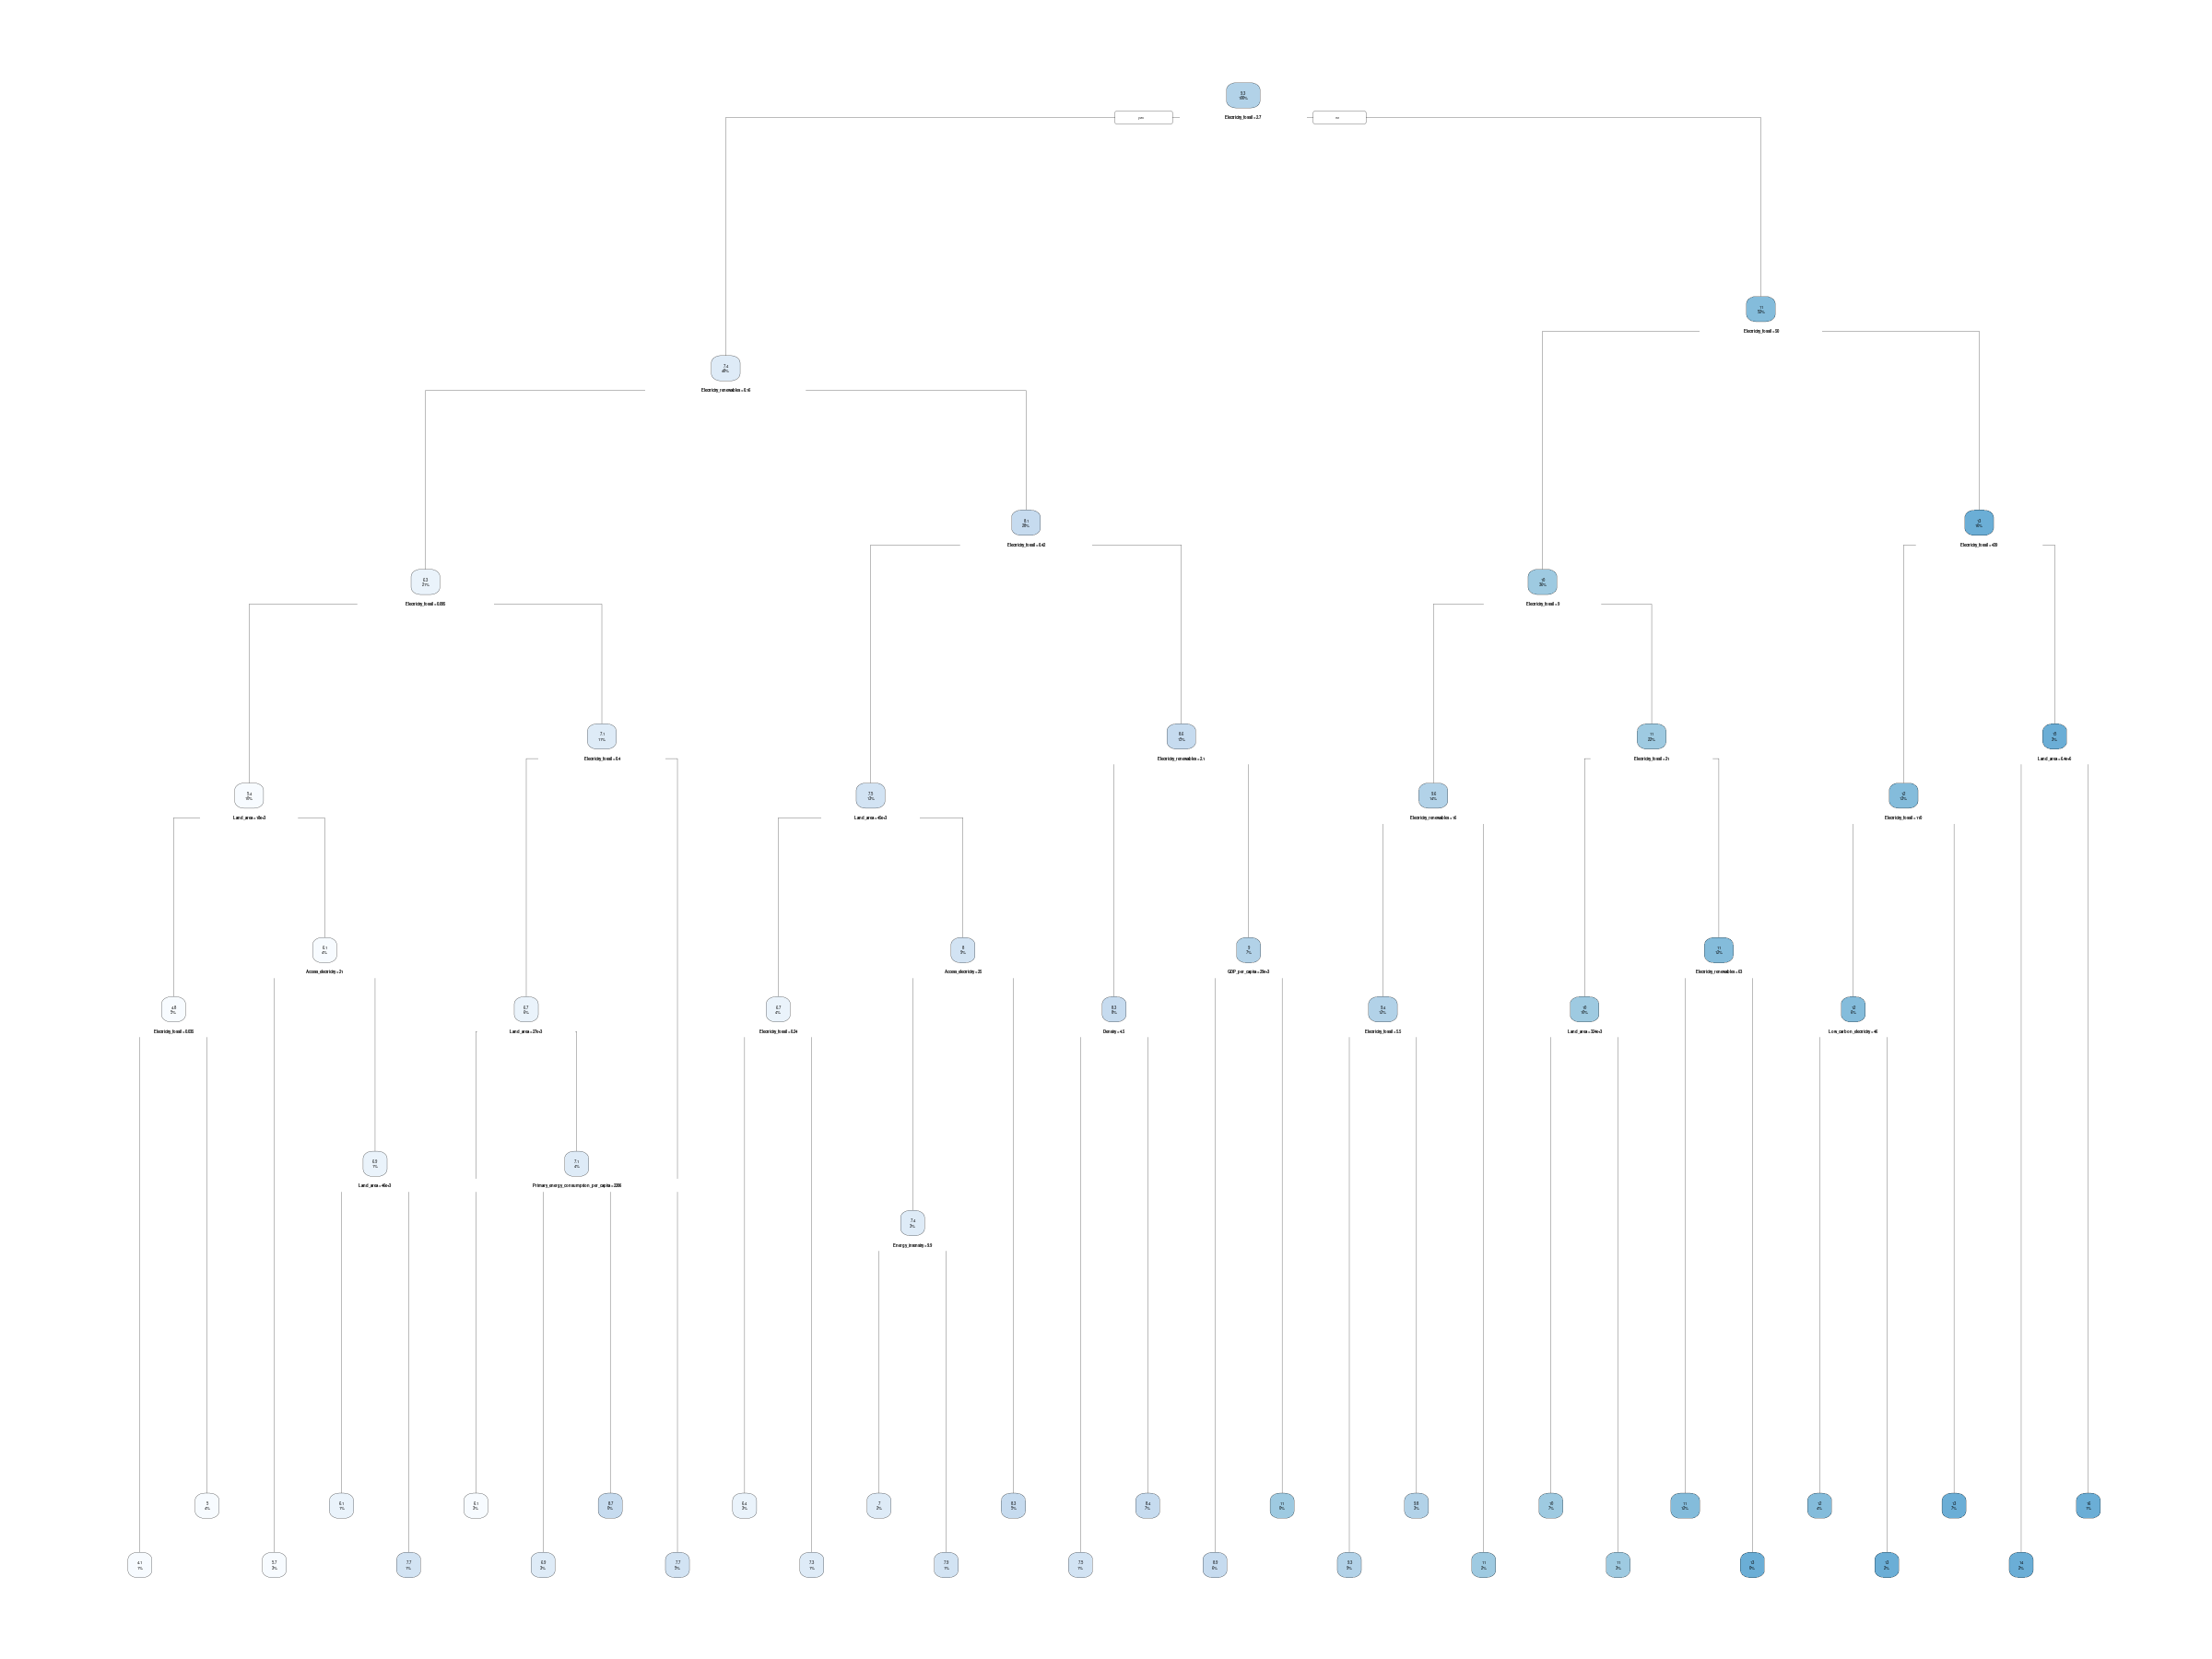

In [105]:
print(paste("cp optimisé:",as.numeric(attributes(which.min(CVerr))$names)))
treeOpt=rpart(Log_CO2_emissions~.,data=Train_log_renom,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))
rpart.plot(treeOpt,type=2,extra="auto")

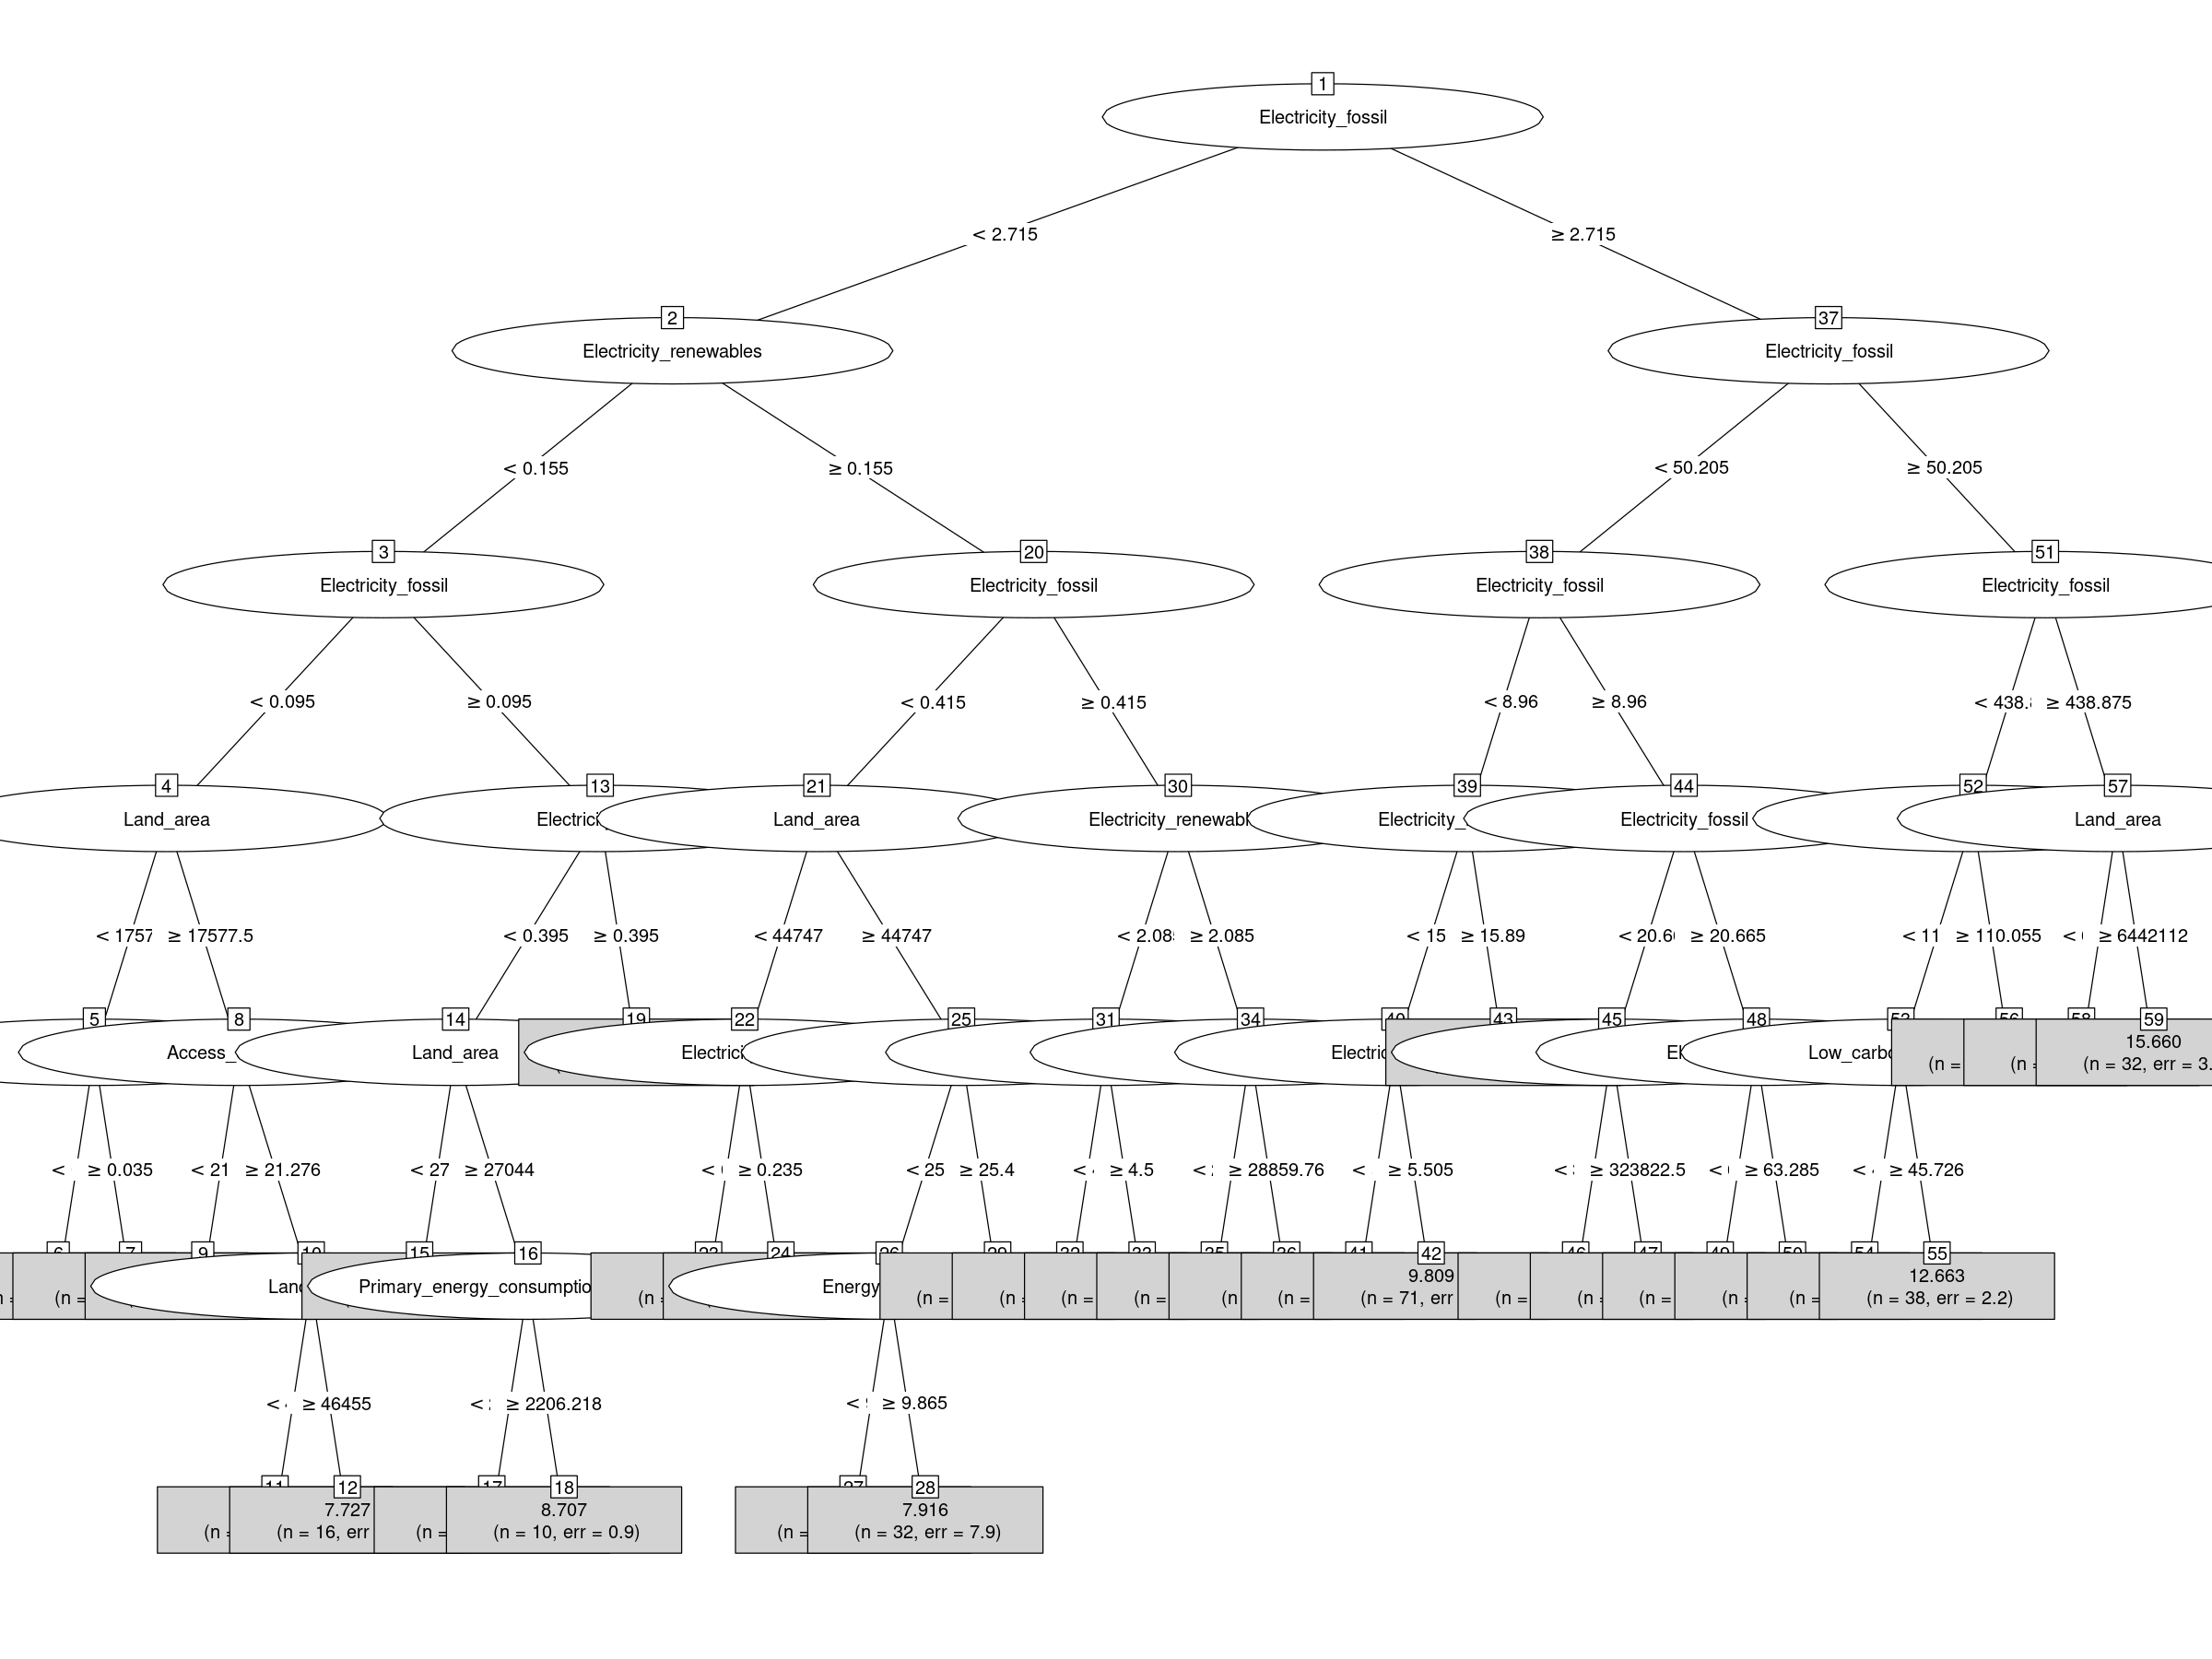

In [107]:
#autre affichage
library(partykit)
plot(as.party(treeOpt), type="simple",cex=0.1)

Affichage du graphe des résidus

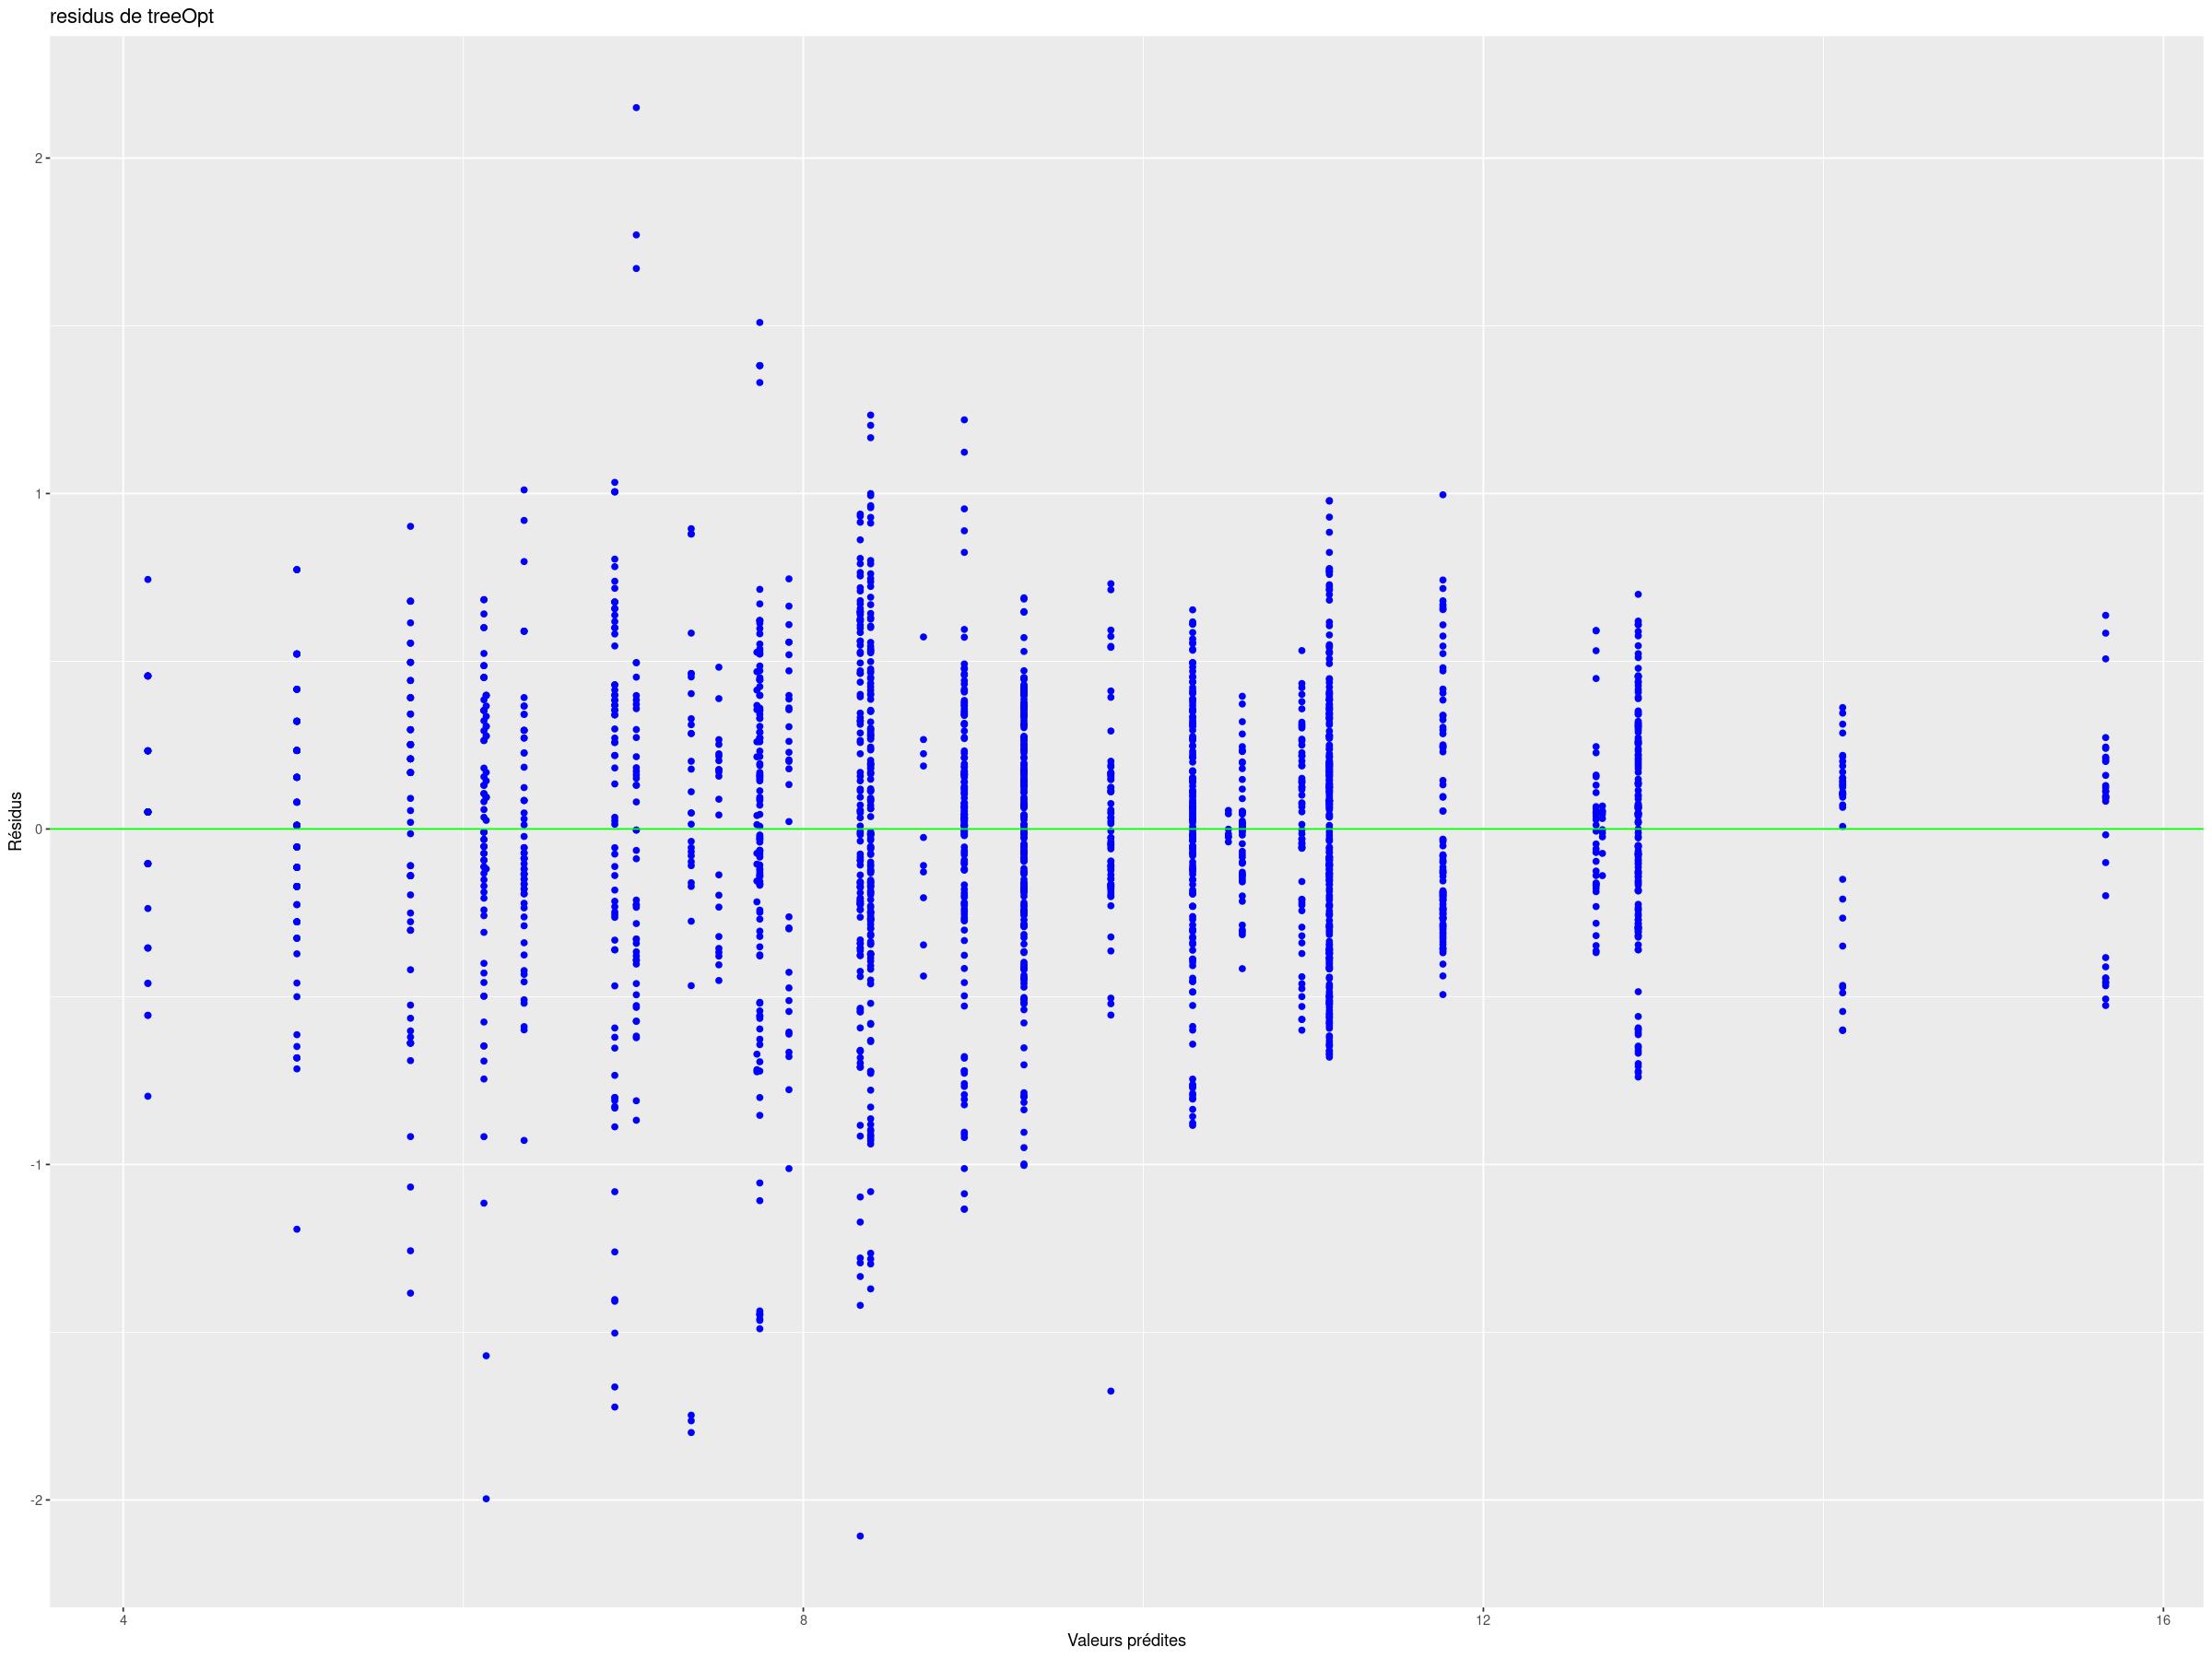

In [109]:
fit.tree=predict(treeOpt)
res.tree=fit.tree-Train_log_renom$Log_CO2_emissions
gplot.res(fit.tree,res.tree,"residus de treeOpt")

Forme particulière car la prédiction est constante par morceaux donc on affiche les résidus de la fonction en fonction des valeurs possibles.

Prévision de l'échantillonage test

In [111]:
# Calcul des prévisions
pred.treer=predict(treeOpt, newdata=Test_log_renom)
# Erreur quadratique moyenne de prévision en régression
sum((pred.treer-Test_log_renom$Log_CO2_emissions)^2)/nrow(Test_log_renom)

[1] 0.1853726

## Forêts aléatoires

L'algorithme random forest est un algorithme d'apprentissage. Il contruit un grand nombre d'arbres de décision où chaque arbre est formé à l'aide d'un échantillon bootstrap des données et en sélectionnant un sous-ensemble aléatoire de variables à chaque nœud de décision. Les prédictions finales sont obtenues en agrégeant les prédictions de tous les arbres, généralement par une moyenne pour les problèmes de régression
 

In [112]:
library(randomForest)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attachement du package : ‘randomForest’


L'objet suivant est masqué depuis ‘package:gridExtra’:

    combine


L'objet suivant est masqué depuis ‘package:ggplot2’:

    margin


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine




Dans la commande suivante nous allons créer une foret aléatoire pour tenter d'expliquer la variable 'Value_co2_log'. Les données d'entrainement sur lesquels le modèle va s'appuyer sont 'datappr'.

Le paramètre 'ntre' spécifie le nombre d'arbres à inclure dans la foret aléatoire.

Le paramètre 'mtry'donne le nombre de variables à sélectionner à chaque fractionnement de l'arbre (par défaut il est ici égal à floor(ncol(datappr)/3)=4 )

Le paramètre 'do.trace' signifie que l'on peut suivre les performances du processus jusqu'à ce que 50 arbres maximum soient construits.

In [113]:
random_forest=randomForest(log_Value_co2_emissions_kt_by_country~., data=train_log, ntree=1000,do.trace=50,importance=TRUE, mtry=3)

     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
  50 |  0.02326     0.40 |
 100 |  0.02059     0.36 |
 150 |   0.0191     0.33 |
 200 |  0.01862     0.32 |
 250 |  0.01806     0.31 |
 300 |  0.01791     0.31 |
 350 |  0.01768     0.31 |
 400 |  0.01757     0.30 |
 450 |   0.0176     0.31 |
 500 |  0.01742     0.30 |
 550 |  0.01735     0.30 |
 600 |  0.01719     0.30 |
 650 |  0.01712     0.30 |
 700 |  0.01711     0.30 |
 750 |  0.01707     0.30 |
 800 |  0.01705     0.30 |
 850 |  0.01703     0.30 |
 900 |    0.017     0.30 |
 950 |  0.01696     0.29 |
1000 |  0.01693     0.29 |


In [116]:
#2ème arbre qui prend en compte les données test
random_forest2 = randomForest(x=train_log, y=train_log$log_Value_co2_emissions_kt_by_country, xtest=test_log, ytest=test_log$log_Value_co2_emissions_kt_by_countr, ntree=1000,do.trace=50,importance=TRUE, mtry=3)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.01144     0.20 |  0.00657     0.12 |
 100 | 0.008452     0.15 | 0.005316     0.10 |
 150 | 0.007857     0.14 | 0.005142     0.10 |
 200 | 0.007355     0.13 | 0.005089     0.09 |
 250 | 0.007103     0.12 |  0.00515     0.10 |
 300 | 0.006896     0.12 | 0.005012     0.09 |
 350 | 0.006954     0.12 |  0.00495     0.09 |
 400 |  0.00693     0.12 | 0.004891     0.09 |
 450 | 0.006834     0.12 | 0.004865     0.09 |
 500 | 0.006835     0.12 | 0.004821     0.09 |
 550 | 0.006886     0.12 | 0.004817     0.09 |
 600 |  0.00682     0.12 | 0.004808     0.09 |
 650 | 0.006805     0.12 | 0.004803     0.09 |
 700 | 0.006796     0.12 | 0.004806     0.09 |
 750 | 0.006787     0.12 | 0.004831     0.09 |
 800 | 0.006796     0.12 | 0.004836     0.09 |
 850 | 0.006741     0.12 | 0.004866     0.09 |
 900 | 0.006698     0.12 | 0.004852     0.09 |
 950 | 0.006649     0.12 | 0.004841     0.09 |
1000 | 0.0066

On cherche à minimiser le critère Out-Of-Bag pour trouver le nombre d'arbre adéquat.
Dans le cas 2, les MSE sont bien plus petites, l'estimation est donc meilleure.

Validation croisée à l'aide de la fonction 'rfcv' dans le package random forest :

In [123]:
random_forestOpt=rfcv(train_log, train_log$log_Value_co2_emissions_kt_by_country, nfold=10)
#print(random_forestOpt)

Prévision de l'échantillon test

In [122]:
y_chap = random_forest2$test$predicted
sum((y_chap-test_log$log_Value_co2_emissions_kt_by_country)^2)/nrow(test_log)

[1] 0.004830052

Résidus en fonction des valeurs prédites

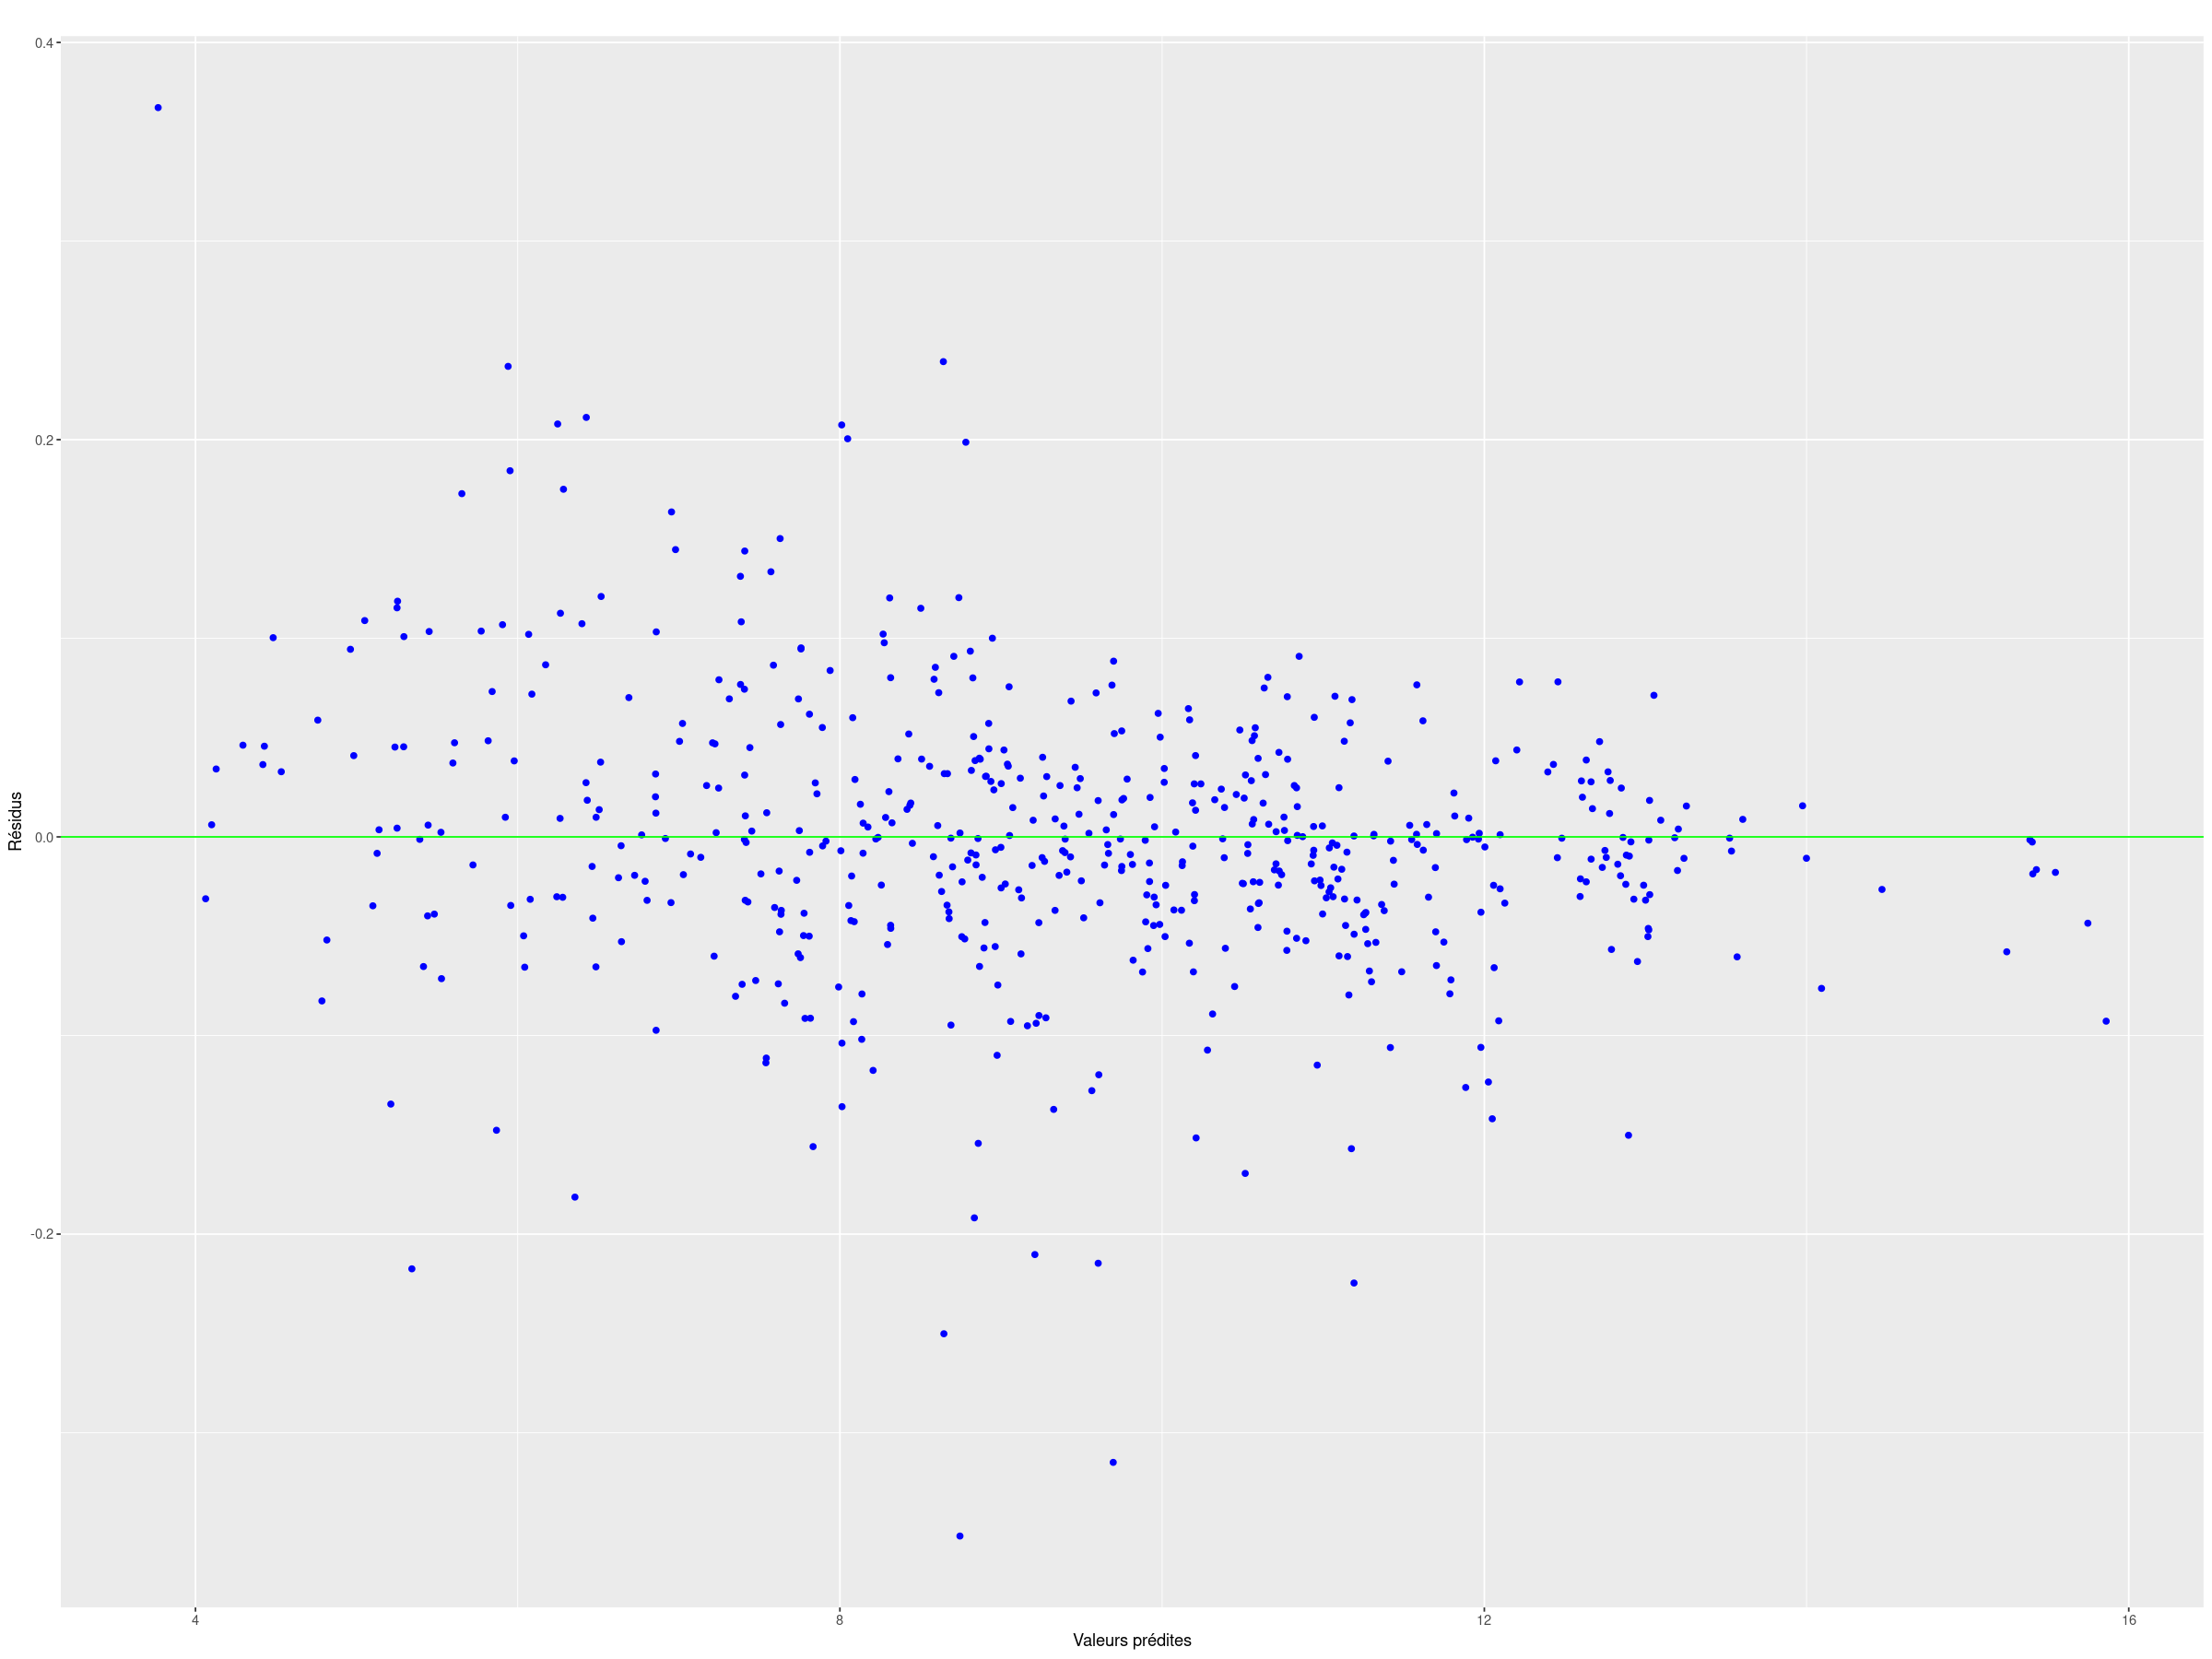

In [124]:
res.rf=y_chap-test_log$log_Value_co2_emissions_kt_by_country
gplot.res(y_chap,res.rf,titre="")

Nous allons afficher l'importance de chaque variable dans la prédiction du résultat:

[1] "-----Classement des variables selon leur importance------"


log_Value_co2_emissions_kt_by_country 
                                                          40.41 
                            Electricity.from.fossil.fuels..TWh. 
                                                          34.81 
                                             log_Land.Area.Km2. 
                                                          29.93 
                                                 Density.P.Km2. 
                                                          29.82 
                         Low.carbon.electricity....electricity. 
                                                          29.61 
                                             log_Density.P.Km2. 
                                                          28.51 
                                                 Land.Area.Km2. 
                                                          27.97 
    Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 
                                                          27.89 
                                                      Longitude 
                                                          27.83 
log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 
                                                          26.45 
                              Electricity.from.renewables..TWh. 
                                                          25.58 
                                                       Latitude 
                                                          21.45 
         log_Primary.energy.consumption.per.capita..kWh.person. 
                                                          20.62 
                              Access.to.clean.fuels.for.cooking 
                                                          19.72 
             Primary.energy.consumption.per.capita..kWh.person. 
                                                          19.38 
                                 Electricity.from.nuclear..TWh. 
                                                          18.51 
                        Access.to.electricity....of.population. 
                                                          17.60 
                                             log_gdp_per_capita 
                                                          16.66 
                                                 gdp_per_capita 
                                                          16.60 
                                                     gdp_growth 
                                                           9.37

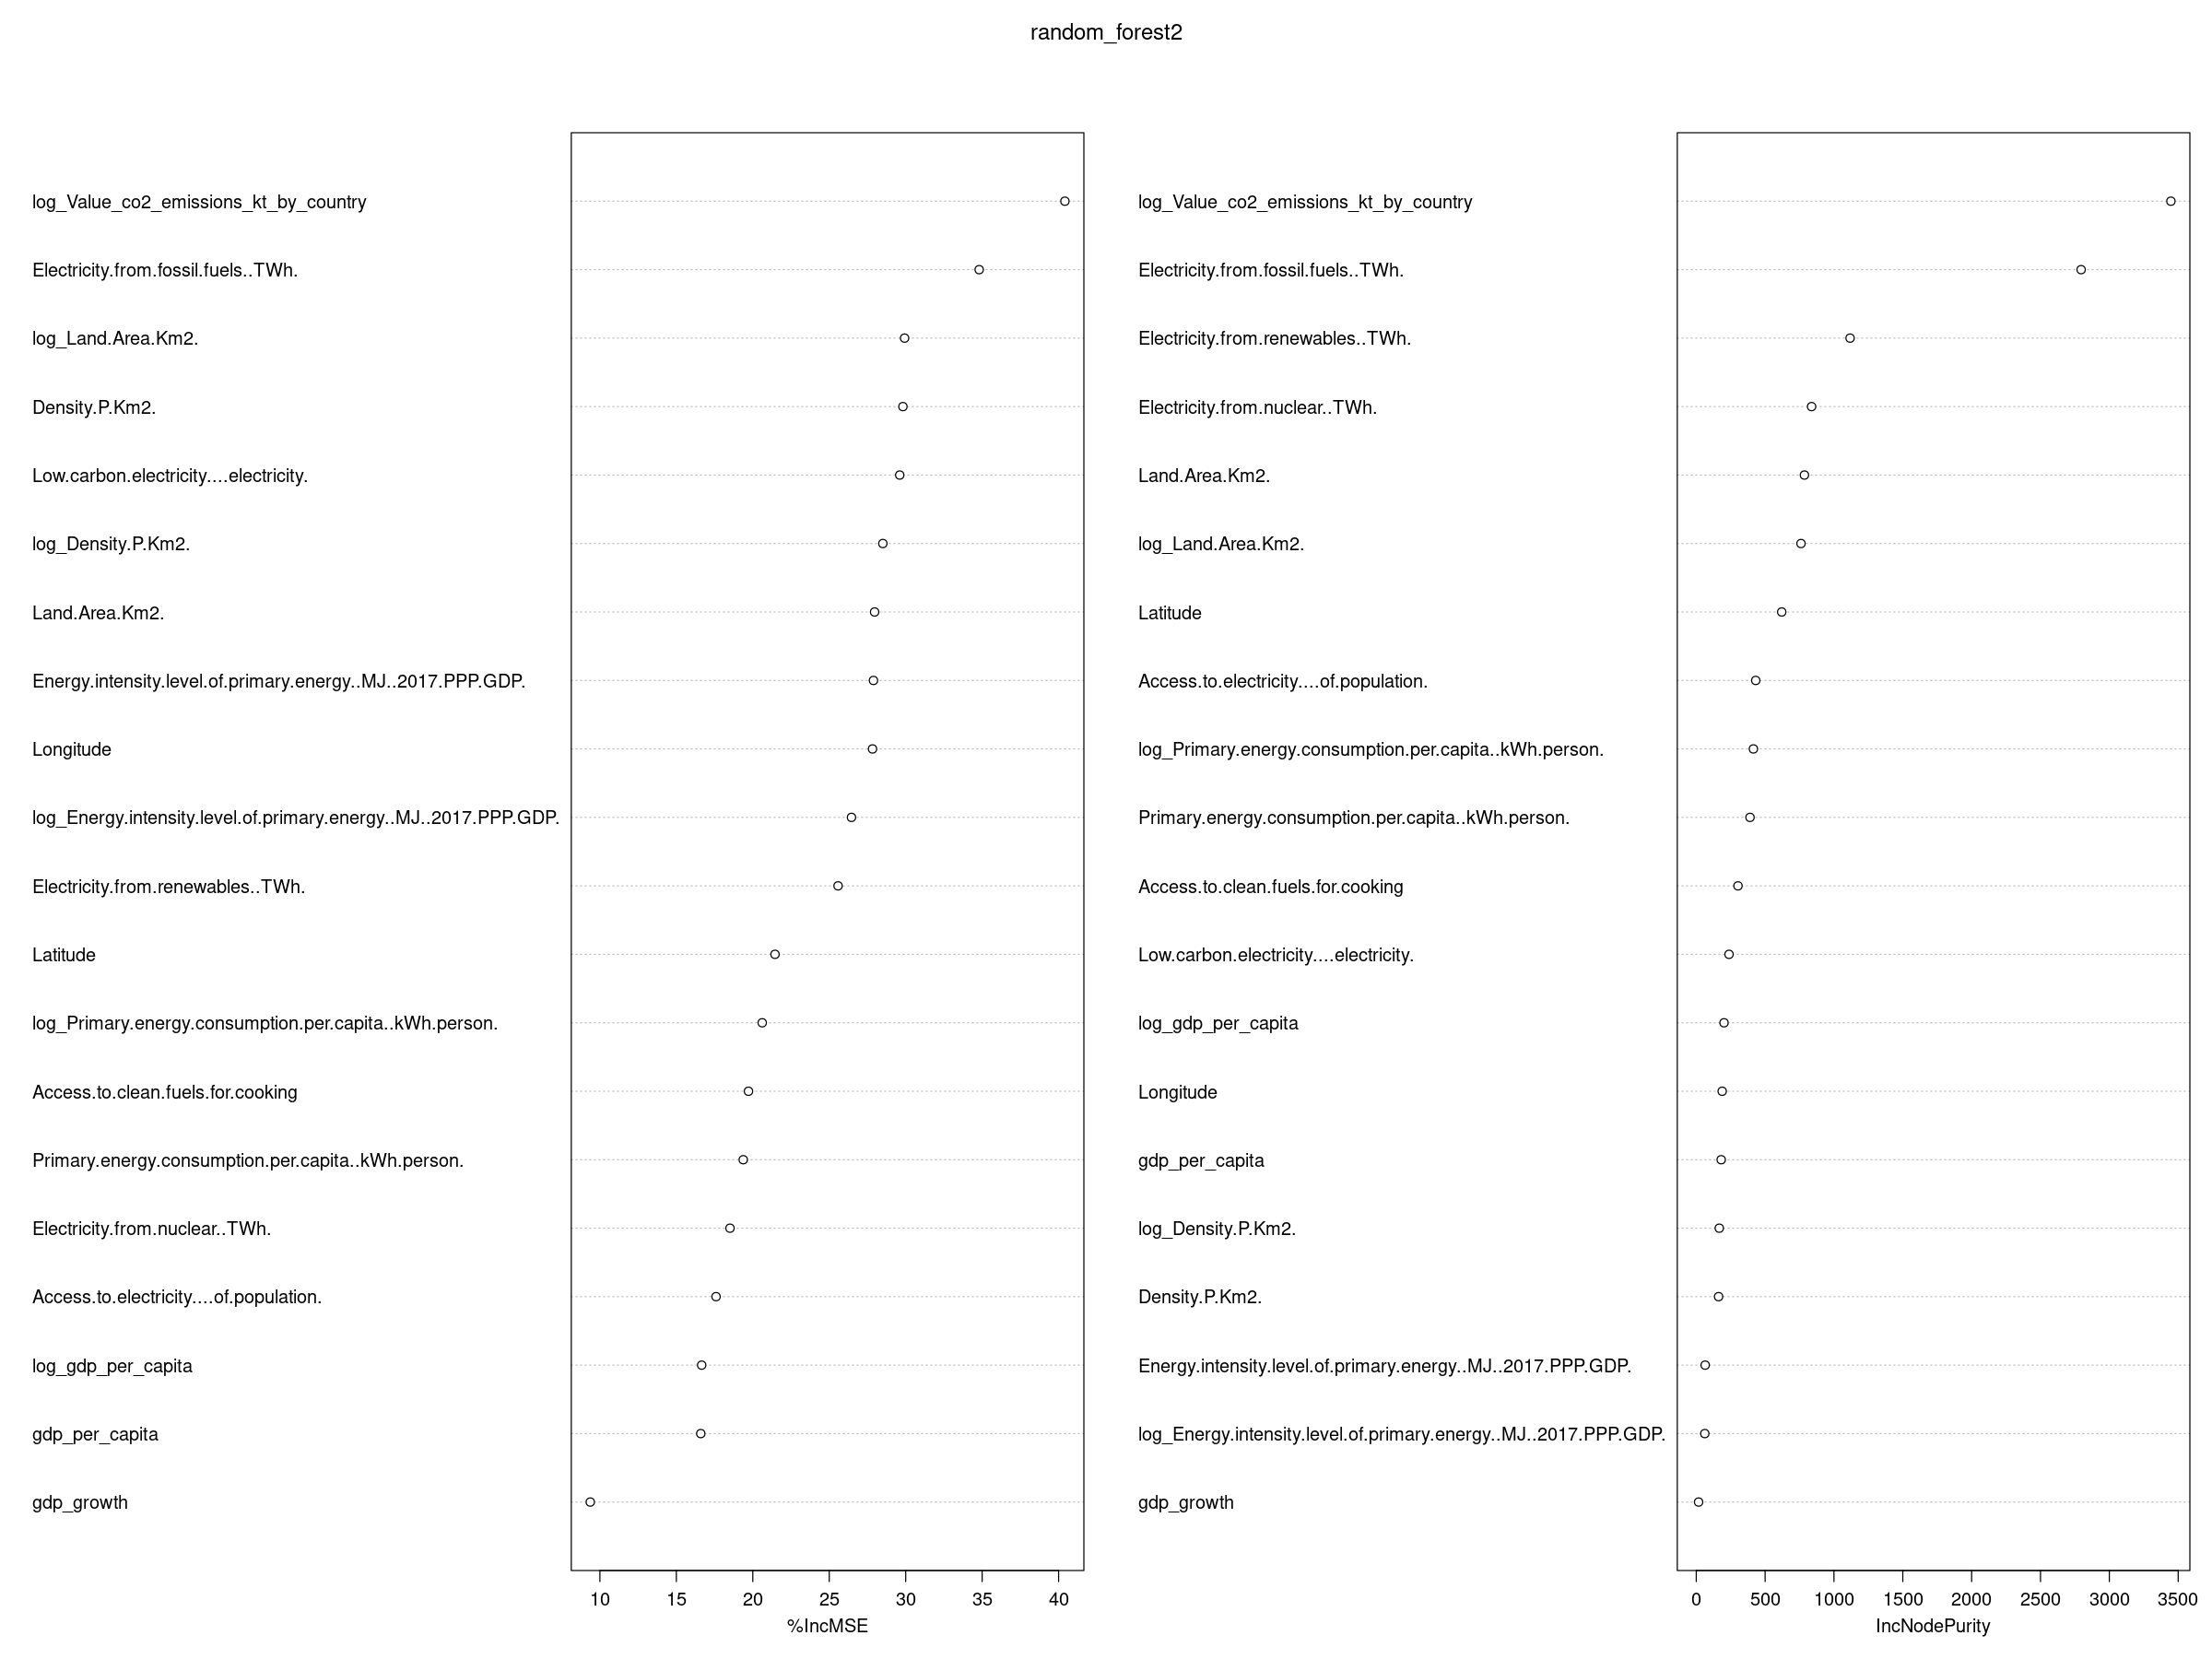

In [118]:
#attributes(rf.reg)
#random_forest2$importance
print('-----Classement des variables selon leur importance------')
sort(round(importance(random_forest2), 2)[,1], decreasing=TRUE)
varImpPlot(random_forest2)

Les variables les plus influentes dans la prédiction de ce modèle sont 'Electricity.from.fossil.fuels..TWh.' et 'Land_Area'.

## Boosting

## Réseaux de neurones

La librairie 'nnet' permet de créer des modèle de réseaux de neurone pour la régression. 
Ici, on crée un modèle où la cible à prédire est 'Value_co2_log' et où les variables explicatives seront 'datappr'.

Le paramètre 'size' spécifie le nimbre de neurones dans la couche cachée du réseau.
Le paramètre 'decay' permet de controler le taux de régularisation appliqué aux poids du modèle pour éviter le surajustement.
Le paramètre 'maxit' spécifie le nombre maximum d'itérations d'entraînement à effectuer.
Le paramètre 'linout = TRUE' indique que la sortie du réseau de neurones sera linéaire.

In [125]:
library(nnet)

In [127]:
#Création du réseau de neurones
nnet=nnet(log_Value_co2_emissions_kt_by_country ~ .,data=train_log,size=5,decay=1, linout=TRUE, maxit=500)
summary(nnet)

# weights:  106
initial  value 233485.183211 
iter  10 value 17881.185274
iter  20 value 12316.237189
iter  30 value 12025.399202
iter  40 value 10947.121382
iter  50 value 10815.947947
iter  60 value 10482.446695
iter  70 value 7615.818729
iter  80 value 6648.032478
iter  90 value 6384.477468
iter 100 value 6058.555491
iter 110 value 5869.098029
iter 120 value 5758.124539
iter 130 value 5519.781327
iter 140 value 5281.728597
iter 150 value 4816.539139
iter 160 value 4736.071946
iter 170 value 4596.197281
iter 180 value 4514.080091
iter 190 value 4487.450087
iter 200 value 4475.515589
iter 210 value 4203.850439
iter 220 value 4157.719932
iter 230 value 3987.494844
iter 240 value 3764.912414
iter 250 value 3733.608848
iter 260 value 3631.785172
iter 270 value 3614.548576
iter 280 value 3590.748848
iter 290 value 3574.257605
iter 300 value 3565.181831
iter 310 value 3556.298318
iter 320 value 3539.182443
iter 330 value 3462.135445
iter 340 value 3367.023098
iter 350 value 3244.411044
ite

a 19-5-1 network with 106 weights
options were - linear output units  decay=1
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
  -0.09   -1.34    0.32   -1.09   -0.71    0.44    0.84   -0.01    0.64   -1.05 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 i18->h1 i19->h1 
   0.01    0.15    0.00    0.67   -0.29   -0.59    0.17   -0.59   -0.28    0.00 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 i16->h2 i17->h2 i18->h2 i19->h2 
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
  -1.18   -0.14   -0.05   -0.01    0.00    0.04    0.01    0.00   -1.44   -0.07 
i10->h3 i11->h3 i12->h3 i13->h3 i14->h3 i15->h3 i16->h3 i17->h3 i18->h3 i19->h3 
   0.00    0.02    0.00   -0.03

Optimisation des paramètres par validation croisée

On recherche ici à ajuster les hyper-paramètres. On va chercher la meilleure combinaison de taille de la couche cachée ('size') et de taux de régularisation ('decay')

In [ ]:
library(e1071)
plot(tune.nnet(log_Value_co2_emissions_kt_by_country ~.,data=train_log,size=c(3,4,5), decay=c(1,2,3), maxit=500,linout=TRUE))
plot(tune.nnet(log_Value_co2_emissions_kt_by_country ~.,data=train_log,size=4:5,decay=1:10))

Quelle combinaison de paramètres donne la meilleure performance ? 

Modèle optimal :

In [ ]:
#on genere le réseau de neurones résultant de notre choix de paramètres précédent
nnetOpt=nnet(log_Value_co2_emissions_kt_by_country~.,data=train_log,size=4,decay=10,linout=TRUE,maxit=200)

# calcul et graphe des résidus
fit.nnetOpt=predict(nnet.reg,data=datappr)
res.nnetOpt=fit.nnetr-train_log$log_Value_co2_emissions_kt_by_country
gplot.res(fit.nnetOpt,res.nnetOpt,titre="")

Prévision de l'échantillon test

In [ ]:
pred.nnetOpt=predict(nnetOpt,newdata=test_log)

## Complétion des données manquantes :